In [39]:
from sklearn import metrics
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [40]:
def sum_of_lower_upper(mat):
    r = len(mat)
    c = len(mat[0])
    diag = np.trace(mat)
    lower_sum = 0
    upper_sum = 0
    over_sum = 0
    under_sum = 0

    for i in range(r):
        for j in range(c):
            if (i<j):
                upper_sum += mat[i][j]

    for i in range(r):
        for j in range(c):
            if (j<i):
                lower_sum += mat[i][j]
    
    for i in range(r):
        for j in range(c):
            if (i+j>=3):
                over_sum += mat[i][j]
            else:
                under_sum += mat[i][j]

    return (upper_sum, lower_sum, diag, over_sum, under_sum)

def shift_list(lst, n):
    return lst[n:] + lst[:n]

In [41]:
def produce(Season, df1, df2, df3, df4, df5):
    Season.rename(columns = {'Date_x':'Date'}, inplace = True)
    for df in [df1, df2, df3, df4, df5]:
        df.rename(columns = {'Date_x':'Date'}, inplace = True)
        try:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
        except KeyError:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
            df.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
            df.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)


    DF = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
    DF = DF.dropna(subset=['BbAv>2.5', 'BbAv<2.5', 'B365H', 'B365D', 'B365A'])
    
    DF = DF[ DF['HM'] != 0] 
    DF = DF[ DF['HM'] != 1] 
    DF = DF[ DF['HM'] != 2] 
    DF = DF[ DF['HM'] != 3]
    cut = int(DF.shape[0])

    subset = DF[['Date', 'HTeam', 'ATeam']].copy()
    DF = DF[[ 'HxG', 'HM', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result']]

    try:
        Season = Season[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
    except KeyError:
        Season = Season[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
        Season.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
        Season.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)
        
    Season = Season.iloc[50:]
    Season_Information = Season[['Date', 'HTeam', 'ATeam', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
    
    DF = pd.concat([DF, Season], ignore_index=True)

    return DF, cut, subset, Season_Information

def Data_cleaning(DF, cut):

    try:
        DF['HxG'] = DF['HxG'].div(DF['HM'])
        DF['HG'] = DF['HG'].div(DF['HM'])
        DF['HGA'] = DF['HGA'].div(DF['HM'])
        DF['HxGA'] = DF['HxGA'].div(DF['HM'])
        DF['AxG'] = DF['AxG'].div(DF['AM'])
        DF['AG'] = DF['AG'].div(DF['AM'])
        DF['AxGA'] = DF['AxG'].div(DF['AM'])
        DF['AGA'] = DF['AGA'].div(DF['AM'])
    except ZeroDivisionError:
        DF['HxG'] = 0
        DF['HG'] = 0
        DF['HGA'] = 0
        DF['HxGA'] = 0
        DF['AxG'] = 0
        DF['AG'] = 0
        DF['AxGA'] = 0
        DF['AGA'] = 0

    DF = DF.reset_index()

    Goals = []
    GoalsSeason = []
    
    for i, x in DF.iloc[:cut].iterrows():
        a=x['Result'].split('\'')
        Goals.append((a[1], a[3]))
    
    for i, x in DF.iloc[cut:].iterrows():
        a=x['Result'].split('\'')
        GoalsSeason.append((a[1], a[3]))

    DF = DF[['HM', 'HxG', 'HxGA', 'HDC', 'HODC', 'HPTS/M', 'AM', 'AxG', 'AxGA', 'ADC', 'AODC', 'APTS/M', 'APPDA', 'AOPPDA', 'HPPDA', 'HOPPDA', 'BbAv>2.5', 'BbAv<2.5', 'B365H', 'B365D', 'B365A']]


    DF['PTSDIF/M']=DF['HPTS/M']-DF['APTS/M']
    DF['M']=(DF['HM']+DF['AM'])/2
    

    DF=np.array(DF)
    DF[np.isnan(DF)] = 0.0

    DFnorm = preprocessing.normalize(DF[:, 0:16], axis=0)
    DF = np.concatenate((DFnorm, DF[:, 16:21]), axis=1)
    return DF, Goals

def predict_season(DF, cut, Goals):
    Season = DF[cut:]
    DF = DF[:cut]
    X_train = np.concatenate((DF[:, 1:6], DF[:, 7:16]), axis=1)
    
    y_train1 = []
    y_train2 = []
    for i, k in enumerate(Goals):
            y_train1.append(int(k[0]))
            y_train2.append(int(k[1]))
    
    reg1 = LinearRegression().fit(X_train, y_train1)
    reg2 = LinearRegression().fit(X_train, y_train2)
    return y_train1, y_train2, reg1, reg2, Season

In [42]:
def produce_form(SeasonForm, df1, df2, df3, df4, df5):
    for df in [df1, df2, df3, df4, df5]:
        try:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
        except KeyError:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
            df.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
            df.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)
            
    
    DF = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
    merged = pd.merge(subset, DF, on=['Date', 'HTeam', 'ATeam'], how='left')

    # resulting dataframe will have columns of B where the triplet of A['a', 'b', 'c'] exists in B
    DF = merged[DF.columns]
    DF = DF[[ 'HxG', 'HM', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result']]
    cutForm = DF.shape[0]
    
    
    try:
        SeasonForm = SeasonForm[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
    except KeyError:
        SeasonForm = SeasonForm[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
        SeasonForm.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
        SeasonForm.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)
        
    SeasonForm = SeasonForm.iloc[50:]
    
    DF = pd.concat([DF, SeasonForm], ignore_index=True)
    return DF, cutForm

def Data_cleaning_form(DF, cutForm):



    try:
        DF['HxG'] = DF['HxG'].div(DF['HM'])
        DF['HG'] = DF['HG'].div(DF['HM'])
        DF['HGA'] = DF['HGA'].div(DF['HM'])
        DF['HxGA'] = DF['HxGA'].div(DF['HM'])
        DF['AxG'] = DF['AxG'].div(DF['AM'])
        DF['AG'] = DF['AG'].div(DF['AM'])
        DF['AxGA'] = DF['AxG'].div(DF['AM'])
        DF['AGA'] = DF['AGA'].div(DF['AM'])
    except ZeroDivisionError:
        DF['HxG'] = 0
        DF['HG'] = 0
        DF['HGA'] = 0
        DF['HxGA'] = 0
        DF['AxG'] = 0
        DF['AG'] = 0
        DF['AxGA'] = 0
        DF['AGA'] = 0

    DF = DF.reset_index()

    Goals = []
    GoalsSeason = []
    
    for i, x in DF.iloc[:cutForm].iterrows():
        try:
            a = str(x['Result']).split('\'')
            Goals.append((a[1], a[3]))
        except IndexError:
            print(a)
    
    for i, x in DF.iloc[cutForm:].iterrows():
        try: 
            a = str(x['Result']).split('\'')
            GoalsSeason.append((a[1], a[3]))
        except IndexError:
            print(a)

    DF = DF[['HM', 'HxG', 'HxGA', 'HDC', 'HODC', 'HPTS/M', 'AM', 'AxG', 'AxGA', 'ADC', 'AODC', 'APTS/M', 'APPDA', 'AOPPDA', 'HPPDA', 'HOPPDA', 'BbAv>2.5', 'BbAv<2.5', 'B365H', 'B365D', 'B365A']]
    

    DF['PTSDIF/M']=DF['HPTS/M']-DF['APTS/M']
    DF['M']=(DF['HM']+DF['AM'])/2
    
    DF = DF.reset_index(drop=True)

    DF=np.array(DF)
    DF[np.isnan(DF)] = 0.0
    
    DFnorm = preprocessing.normalize(DF[:, 0:16], axis=0)
    DF = np.concatenate((DFnorm, DF[:, 16:21]), axis=1)
    return DF, Goals, GoalsSeason

def predict_season_form(DF, cutForm, Goals):
    SeasonForm = DF[cutForm:]
    DF = DF[:cutForm]

    X_train = np.concatenate((DF[:, 1:6], DF[:, 7:16]), axis=1)

    y_train1 = []
    y_train2 = []
    for i, k in enumerate(Goals):
            y_train1.append(int(k[0]))
            y_train2.append(int(k[1]))

    regForm1 = LinearRegression().fit(X_train, y_train1)
    regForm2 = LinearRegression().fit(X_train, y_train2)
    return y_train1, y_train2, regForm1, regForm2, SeasonForm

In [43]:
def Results(GoalsSeason, Season, SeasonForm):
    OVER = []
    UNDER = []
    HOME = []
    DRAW = []
    AWAY = []

    for i, x in enumerate(GoalsSeason):
        if int((GoalsSeason[i])[0])+int((GoalsSeason[i])[1])>=3:
            OVER.append(1)
            UNDER.append(0)
        else:
            OVER.append(0)
            UNDER.append(1)

        if int((GoalsSeason[i])[0])>int((GoalsSeason[i])[1]):
            HOME.append(1)
            DRAW.append(0)
            AWAY.append(0)
        if int((GoalsSeason[i])[0])==int((GoalsSeason[i])[1]):
            HOME.append(0)
            DRAW.append(1)
            AWAY.append(0)
        if int((GoalsSeason[i])[0])<int((GoalsSeason[i])[1]):
            HOME.append(0)
            DRAW.append(0)
            AWAY.append(1)

    #y_test1 = []
    #y_test2 = []
    #for i, k in enumerate(GoalsSeason):
    #    y_train1.append(int(k[0]))
    #    y_train2.append(int(k[1]))

    X_test = np.concatenate((SeasonForm[:, 1:6], SeasonForm[:, 7:16]), axis=1)
    X_testO = Season[:, 16]
    X_testU = Season[:, 17]
    X_testH = Season[:, 18]
    X_testD = Season[:, 19]
    X_testA = Season[:, 20]
    return OVER, UNDER, HOME, DRAW, AWAY, X_test, X_testO, X_testU, X_testH, X_testD, X_testA

In [44]:
def bet_season(LamdaHomeFinal, LamdaAwayFinal, SeasonInformation, bank):
    k = range(12)
    PH = np.zeros((len(k), 1))
    PA = np.zeros((1, len(k)))

    Away = []
    Home = [] 
    Draw = []
    Over = []
    Under = []
    Hpred = []
    Apred = []
    Dpred = []
    Opred = []
    Upred = []
    for j, l in enumerate(LamdaHomeFinal):
        for i in k:
            PH[i, 0] = (math.exp(-l)*l**k[i]) /math.factorial(k[i])
            PA[0, i] = (math.exp(-LamdaAwayFinal[j])*LamdaAwayFinal[j]**k[i]) /math.factorial(k[i])
        Pscore = np.matmul(PH, PA) 
        df = pd.DataFrame(Pscore, columns = ['0','1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
        a, b, c, d, e = sum_of_lower_upper(Pscore)
        Away.append(a)
        Home.append(b)
        Draw.append(c)
        Over.append(d)
        Under.append(e)

    y_pred = []
    y_predU = []
    y_predH = []
    y_predA = []
    y_predD = []
    Over_Info = []
    Under_Info =[] 
    Home_Info = []
    Draw_Info =[]
    Away_Info = []
    for i, y in enumerate(Home):
        if (0.85>=y>=0.6) and (y-1/X_testH[i]>=0.003):
            y_predH.append(1)
            Hpred.append(y)
        else:
            y_predH.append(0)

        if (0.75>=Away[i]>=0.5) and (Away[i]-1/X_testA[i]>=0.005):
            y_predA.append(1)
            Apred.append(Away[i])
        else:
            y_predA.append(0)

        if (Draw[i]-1/X_testD[i]>=0.03):
            y_predD.append(1)
            Dpred.append(Draw[i])
        else:
            y_predD.append(0)

        if (0.75>=Over[i]>=0.5) and (Over[i]-1/X_testO[i]>=0.005):
            y_pred.append(1)
            Opred.append(Over[i])
        else:
            y_pred.append(0)

        if (0.7>=Under[i]>=0.5) and (Under[i]-1/X_testU[i]>=0.005):
            y_predU.append(1)
            Upred.append(Under[i])
        else:
            y_predU.append(0)




    y_pred = np.array(y_pred, dtype=bool)
    y_pred = y_pred.astype(int)

    y_all= []
    y_allU = []
    y_allH = []
    y_allD = []
    y_allA = []
    Bet = []
    BetU = []
    BetH = []
    BetA = []
    BetD = []
    bankO = []
    bankU = []
    bankH = []
    bankA = []
    bankD = []
    Isozugio = []
    IsozugioU = []
    IsozugioH = []
    IsozugioD = []
    IsozugioA = []
    Perc = []
    PercU = []
    PercH = []
    PercD = []
    PercA = []
    sumBet = []
    sumBetU = []
    sumBetH = []
    sumBetA = []
    sumBetD = []
    sumKer = []
    sumKerU = []
    sumKerH = []
    sumKerD = []
    sumKerA = []
    Net_gainO = []
    Net_gainU =[]
    Net_gainH =[]
    Net_gainD =[]
    Net_gainA =[]
    ROI_O = []
    ROI_U = []
    ROI_H = []
    ROI_D = [] 
    ROI_A = []
    Pont = 5
    bankO.append(bank)
    bankU.append(bank)
    bankH.append(bank)
    bankD.append(bank)
    bankA.append(bank) 
    
    for i, y in enumerate(OVER):
        lineBet     = []
        lineBetU = []
        lineBetH = []
        lineBetD = []
        lineBetA = []
        linesumKer = []
        linesumKerU = []
        linesumKerH = []
        linesumKerD = []
        linesumKerA = []



        #Bet_over = min(abs(Pont*10*(Over[i]-1/X_testO[i])), 15)
        #Bet_under = min(abs(Pont*10*(Under[i]-1/X_testU[i])), 15)
        #Bet_home = min(abs(Pont*10*(Home[i]-1/X_testH[i])), 15)
        #Bet_draw = min(abs(Pont*10*(Draw[i]-1/X_testD[i])), 15)
        #Bet_away = min(abs(Pont*10*(Away[i]-1/X_testA[i])), 15)
        Bet_over =  max(0, bank*(Over[i]- (1-Over[i])/(X_testO[i]-1)))
        Bet_under = max(0, bank*(Under[i]- (1-Under[i])/(X_testU[i]-1)))
        Bet_home =  max(0, bank*(Home[i]- (1-Home[i])/(X_testH[i]-1)))
        Bet_draw =  max(0, bank*(Draw[i]- (1-Draw[i])/(X_testD[i]-1)))
        Bet_away =  max(0, bank*(Away[i]- (1-Away[i])/(X_testA[i]-1)))

        Bet.append(y_pred[i]*Bet_over)
        BetU.append(y_predU[i]*Bet_under)
        BetH.append(y_predH[i]*Bet_home)
        BetD.append(y_predD[i]*Bet_draw)
        BetA.append(y_predA[i]*Bet_away)
        y_all.append(y_pred[i]*Bet_over*y*(X_testO[i]))
        y_allU.append(y_predU[i]*Bet_under*UNDER[i]*(X_testU[i]))
        y_allH.append(y_predH[i]*Bet_home*HOME[i]*(X_testH[i]))
        y_allD.append(y_predD[i]*Bet_draw*DRAW[i]*(X_testD[i]))
        y_allA.append(y_predA[i]*Bet_away*AWAY[i]*(X_testA[i]))
        
        
        bankO.append(bankO[i] -y_pred[i]*Bet_over +y_pred[i]*Bet_over*y*(X_testO[i]))
        bankU.append(bankU[i] -y_predU[i]*Bet_under +y_predU[i]*Bet_under*UNDER[i]*(X_testU[i]))
        bankH.append(bankH[i] -y_predH[i]*Bet_home +y_predH[i]*Bet_home*HOME[i]*(X_testH[i]))
        bankD.append(bankD[i] -y_predD[i]*Bet_draw +y_predD[i]*Bet_draw*DRAW[i]*(X_testD[i]))
        bankA.append(bankA[i] -y_predA[i]*Bet_away +y_predA[i]*Bet_away*AWAY[i]*(X_testA[i]))

        sumBet.append(sum(Bet))
        sumBetU.append(sum(BetU))
        sumBetH.append(sum(BetH))
        sumBetA.append(sum(BetA))
        sumBetD.append(sum(BetD))
        
        if y_pred[i] != 0:
            Net_gainO.append(bankO[-1] - bank)
            Over_Info.append(SeasonInformation.iloc[i])
            
            
        if y_predU[i] != 0:
            Net_gainU.append(bankU[-1] - bank)
            Under_Info.append(SeasonInformation.iloc[i])
        
        if y_predH[i] != 0:
            Net_gainH.append(bankH[-1] - bank)
            Home_Info.append(SeasonInformation.iloc[i])
        
        if y_predD[i] != 0:
            Net_gainD.append(bankD[-1] - bank)
            Draw_Info.append(SeasonInformation.iloc[i])
        
        if y_predA[i] != 0:
            Net_gainA.append(bankA[-1] - bank)
            Away_Info.append(SeasonInformation.iloc[i])
        
        if y_pred[i] != 0:
            ROI_O.append(Net_gainO[-1]*100/bank)
        
        if y_predU[i] != 0:
            ROI_U.append(Net_gainU[-1]*100/bank)
        
        if y_predH[i] != 0:
            ROI_H.append(Net_gainH[-1]*100/bank)
        
        if y_predD[i] != 0:
            ROI_D.append(Net_gainD[-1]*100/bank)
        
        if y_predA[i] != 0: 
            ROI_A.append(Net_gainA[-1]*100/bank)
        
        Isozugio.append(sum(y_all)- sum(Bet))
        IsozugioU.append(sum(y_allU)- sum(BetU))
        IsozugioH.append(sum(y_allH)- sum(BetH))
        IsozugioD.append(sum(y_allD)- sum(BetD))
        IsozugioA.append(sum(y_allA)- sum(BetA))
        Perc.append(100*(sum(y_all)- sum(Bet))/sum(Bet))
        PercU.append(100*(sum(y_allU)- sum(BetU))/sum(BetU))
        PercH.append(100*(sum(y_allH)- sum(BetH))/sum(BetH))
        PercD.append(100*(sum(y_allD)- sum(BetD))/sum(BetD))
        PercA.append(100*(sum(y_allA)- sum(BetA))/sum(BetA))
        sumKer.append(sum(y_all))
        sumKerU.append(sum(y_allU))
        sumKerH.append(sum(y_allH))
        sumKerD.append(sum(y_allD))
        sumKerA.append(sum(y_allA))

    

    Over_bet = (sum(y_pred), len(y_pred), sum(Bet), Perc[len(Perc)-1], Isozugio[len(Isozugio)-1], ROI_O, Net_gainO, Over_Info)
    Under_bet = (sum(y_predU), len(y_predU), sum(BetU), PercU[len(PercU)-1], IsozugioU[len(IsozugioU)-1], ROI_U, Net_gainU, Under_Info)
    Draw_bet = (sum(y_predD), len(y_predD), sum(BetD), PercD[len(PercD)-1], IsozugioD[len(IsozugioD)-1], ROI_D, Net_gainD, Draw_Info)
    Home_bet = (sum(y_predH), len(y_predH), sum(BetH), PercH[len(PercH)-1], IsozugioH[len(IsozugioH)-1], ROI_H, Net_gainH, Home_Info)
    Away_bet = (sum(y_predA), len(y_predA), sum(BetA), PercA[len(PercA)-1], IsozugioA[len(IsozugioA)-1], ROI_A, Net_gainA, Away_Info)
    return Over_bet, Under_bet, Home_bet, Draw_bet, Away_bet

In [45]:
df1 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2017.csv')
df2 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2018.csv')
df3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2019.csv')
df4 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2020.csv')
df5 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2021.csv')
df6 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2022.csv')
df7 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2023.csv')

df1_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2017Monthly.csv')
df2_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2018Monthly.csv')
df3_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2019Monthly.csv')
df4_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2020Monthly.csv')
df5_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2021Monthly.csv')
df6_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2022Monthly.csv')
df7_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2023Monthly.csv')

df1_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2017_3Months.csv')
df2_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2018_3Months.csv')
df3_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2019_3Months.csv')
df4_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2020_3Months.csv')
df5_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2021_3Months.csv')
df6_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2022_3Months.csv')
df7_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2023_3Months.csv')

lst = [df1, df2, df3, df4, df5, df6]
lst_form = [df1_form, df2_form, df3_form, df4_form, df5_form, df6_form]
lst_form3 = [df1_form3, df2_form3, df3_form3, df4_form3, df5_form3, df6_form3]

Over_bet_list  = []
Under_bet_list = []
Home_bet_list = []
Draw_bet_list = []
Away_bet_list = []

Home_Info_list = []
Away_Info_list = []
Draw_Info_list = []
Over_Info_list = []
Under_Info_list = []

for i in range(len(lst)+1):
    h = shift_list(lst, i)
    d = shift_list(lst_form, i)
    g = shift_list(lst_form3, i)

    DF, cut, subset, SeasonInformation = produce(*h)
    DF, Goals = Data_cleaning(DF, cut)
    y_train1, y_train2, reg1, reg2, Season = predict_season(DF, cut, Goals)
    
    DF, cutForm = produce_form(*d)
    DF, Goals, GoalsSeason = Data_cleaning_form(DF, cutForm)
    y_train1, y_train2, regForm1, regForm2, SeasonForm = predict_season_form(DF, cutForm, Goals)
    
    DF, cutForm = produce_form(*d)
    DF, Goals, GoalsSeason = Data_cleaning_form(DF, cutForm)
    y_train1, y_train2, regForm1_3, regForm2_3, SeasonForm = predict_season_form(DF, cutForm, Goals)

    OVER, UNDER, HOME, DRAW, AWAY, X_test, X_testO, X_testU, X_testH, X_testD, X_testA = Results(GoalsSeason, Season, SeasonForm)
    
    LamdaHome= reg1.predict(X_test)
    LamdaAway= reg2.predict(X_test)
    
    LamdaHomeForm= regForm1.predict(X_test)
    LamdaAwayForm= regForm2.predict(X_test)
    
    LamdaHomeForm3= regForm1_3.predict(X_test)
    LamdaAwayForm3= regForm2_3.predict(X_test)
    
    LamdaAwayFinal = [(LamdaAway[i] * 0.4 + LamdaAwayForm[i] * 0 + LamdaAwayForm3[i]*0.6) for i in range(len(LamdaAway))]
    LamdaHomeFinal = [(LamdaHome[i] * 0.4 + LamdaHomeForm[i] * 0 + LamdaHomeForm3[i]*0.6) for i in range(len(LamdaHome))]
    
    bank = 50
    o, u, h, d, a = bet_season(LamdaHomeFinal, LamdaAwayFinal, SeasonInformation, bank)
    Over_bet_list.append(o)
    Under_bet_list.append(u)
    Home_bet_list.append(h)
    Draw_bet_list.append(d)
    Away_bet_list.append(a)
    
    
for i, y in enumerate([2017, 2018, 2019, 2020, 2021, 2022, 2023]):
    print(y)
    
    print('Under')
    print(f'Predicted {Under_bet_list[i][0]} matches out of the {Under_bet_list[i][1]} for {Under_bet_list[i][2]} euros')
    print(f'Hit {Under_bet_list[i][3]} % per match for {Under_bet_list[i][4]} euros')
    print(f'Hit {Under_bet_list[i][4]} % on the budget of 100 euros')

    print('Over')
    print(f'Predicted {Over_bet_list[i][0]} matches out of the {Over_bet_list[i][1]} for {Over_bet_list[i][2]} euros')
    print(f'Hit {Over_bet_list[i][3]} % per match for {Over_bet_list[i][4]} euros')
    print(f'Hit {Over_bet_list[i][4]} % on the budget of 100 euros')

    print('Home wins')
    print(f'Predicted {Home_bet_list[i][0]} matches out of the {Home_bet_list[i][1]} for {Home_bet_list[i][2]} euros')
    print(f'Hit {Home_bet_list[i][3]} % per match for {Home_bet_list[i][4]} euros')
    print(f'Hit {Home_bet_list[i][4]} % on the budget of 100 euros')

    print('Away wins')
    print(f'Predicted {Away_bet_list[i][0]} matches out of the {Away_bet_list[i][1]} for {Away_bet_list[i][2]} euros')
    print(f'Hit {Away_bet_list[i][3]} % per match for {Away_bet_list[i][4]} euros')
    print(f'Hit {Away_bet_list[i][4]} % on the budget of 100 euros')

    print('Draws')
    print(f'Predicted {Draw_bet_list[i][0]} matches out of the {Draw_bet_list[i][1]} for {Draw_bet_list[i][2]} euros')
    print(f'Hit {Draw_bet_list[i][3]} % per match for {Draw_bet_list[i][4]} euros')
    print(f'Hit {Draw_bet_list[i][4]} % on the budget of 100 euros')   
    
    print('\n')

/tmp/ipykernel_72967/62063841.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
/tmp/ipykernel_72967/62063841.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)
/tmp/ipykernel_72967/62063841.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
/tmp/ipyk

2017
Under
Predicted 30 matches out of the 330 for 95.91416492541948 euros
Hit -48.2521300862862 % per match for -46.2806276309885 euros
Hit -46.2806276309885 % on the budget of 100 euros
Over
Predicted 53 matches out of the 330 for 1403.1681478746802 euros
Hit -0.10211852553861031 % per match for -1.4328946234370505 euros
Hit -1.4328946234370505 % on the budget of 100 euros
Home wins
Predicted 41 matches out of the 330 for 253.68323418970704 euros
Hit -18.021884292149704 % per match for -45.71849893425215 euros
Hit -45.71849893425215 % on the budget of 100 euros
Away wins
Predicted 19 matches out of the 330 for 199.54827730972673 euros
Hit -19.277442629093965 % per match for -38.467804675727905 euros
Hit -38.467804675727905 % on the budget of 100 euros
Draws
Predicted 29 matches out of the 330 for 56.793866148949085 euros
Hit -59.03160240657709 % per match for -33.5263292563712 euros
Hit -33.5263292563712 % on the budget of 100 euros


2018
Under
Predicted 31 matches out of the 330 fo

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


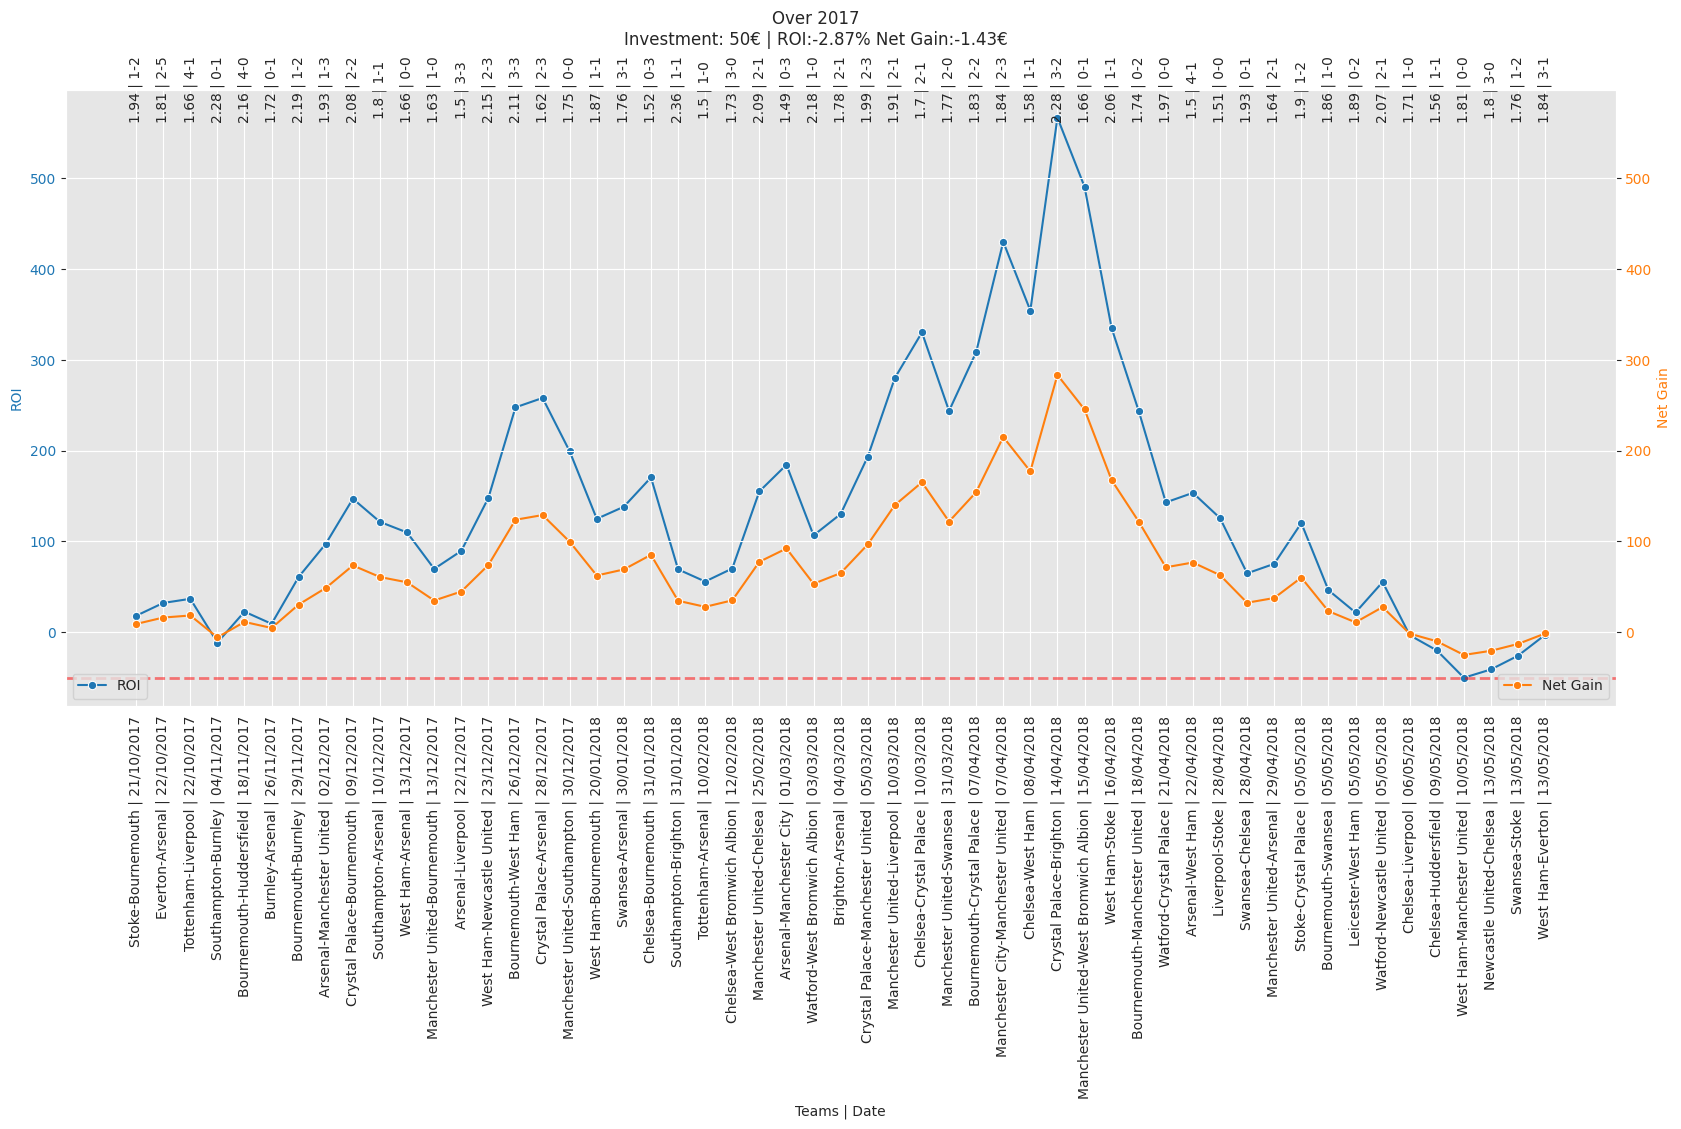

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


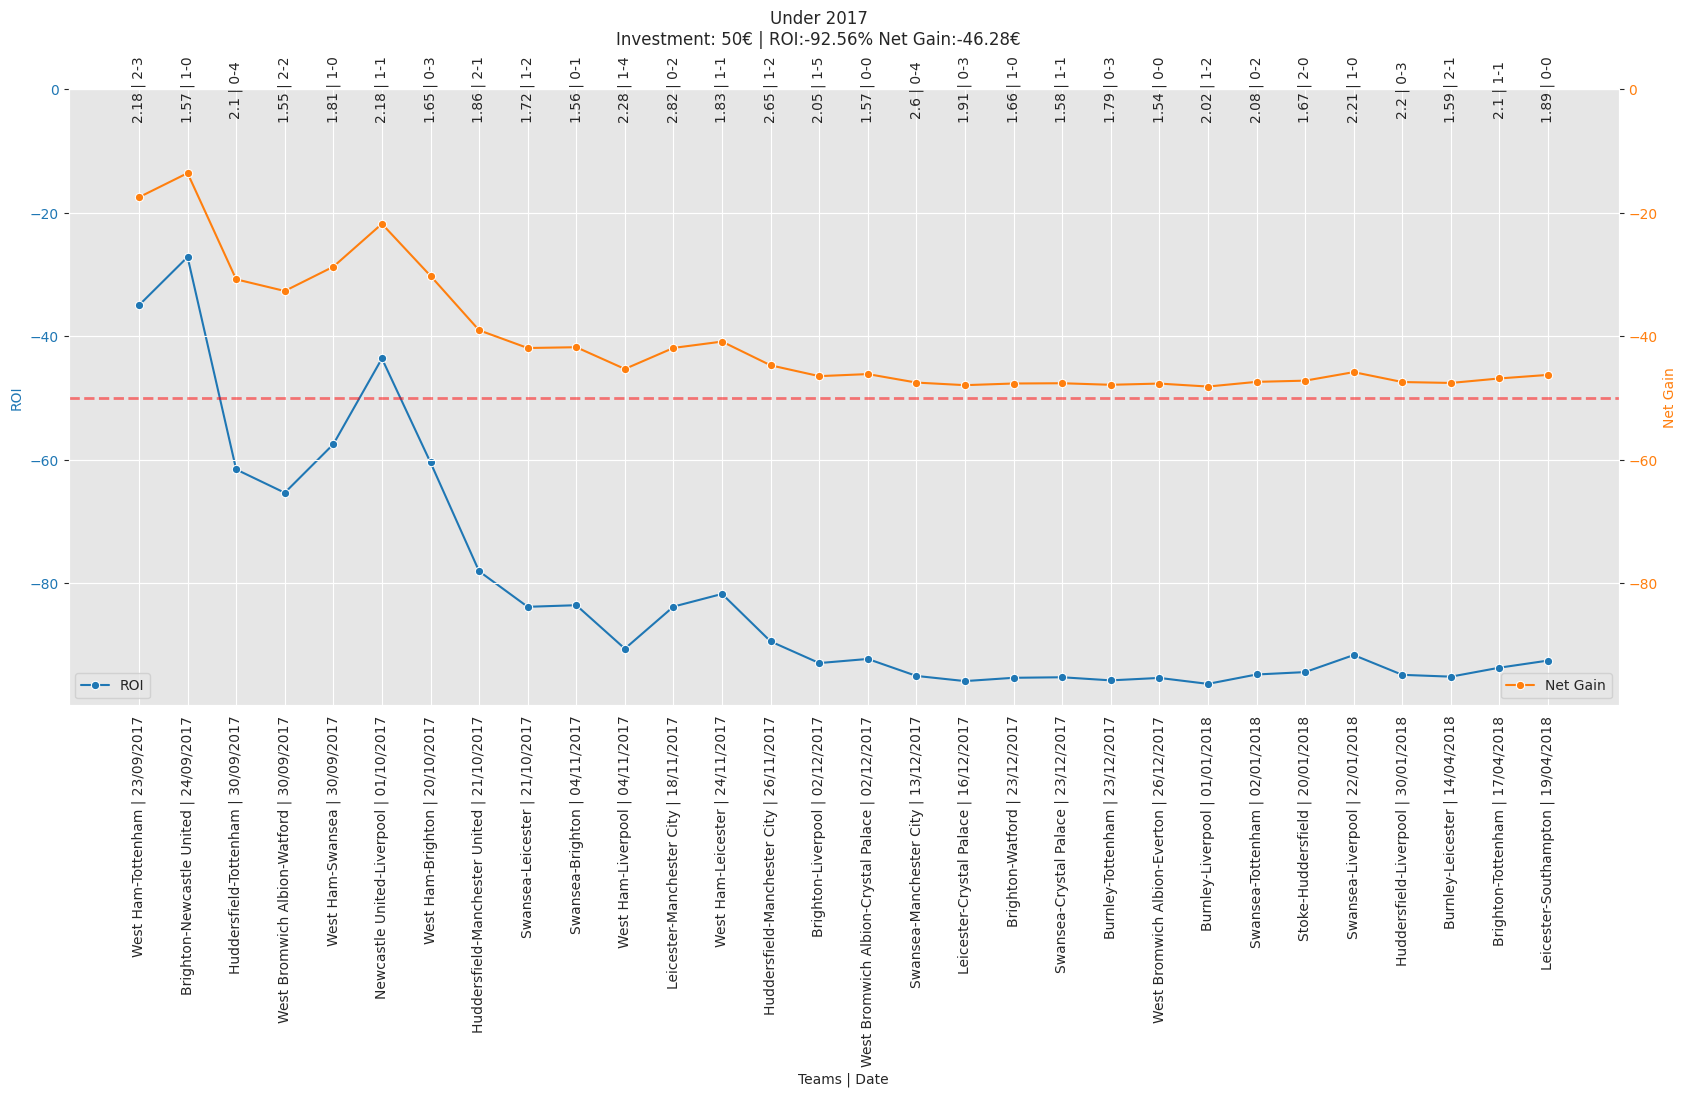

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


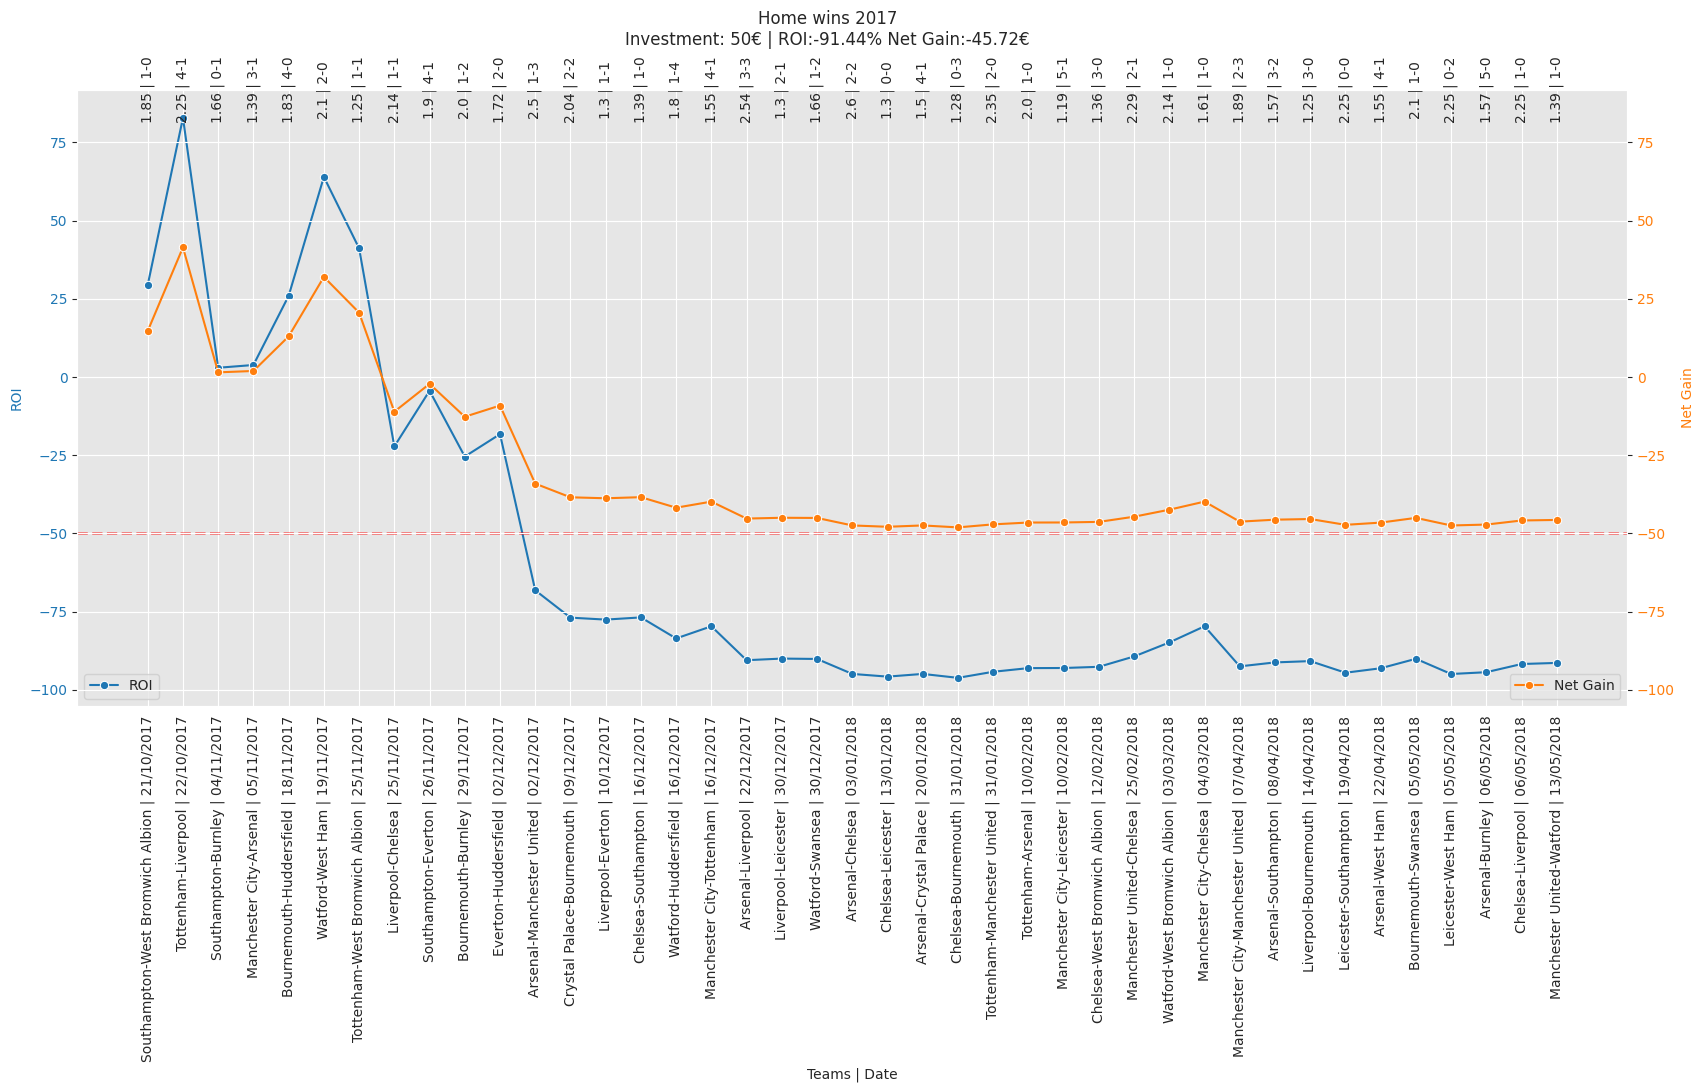

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


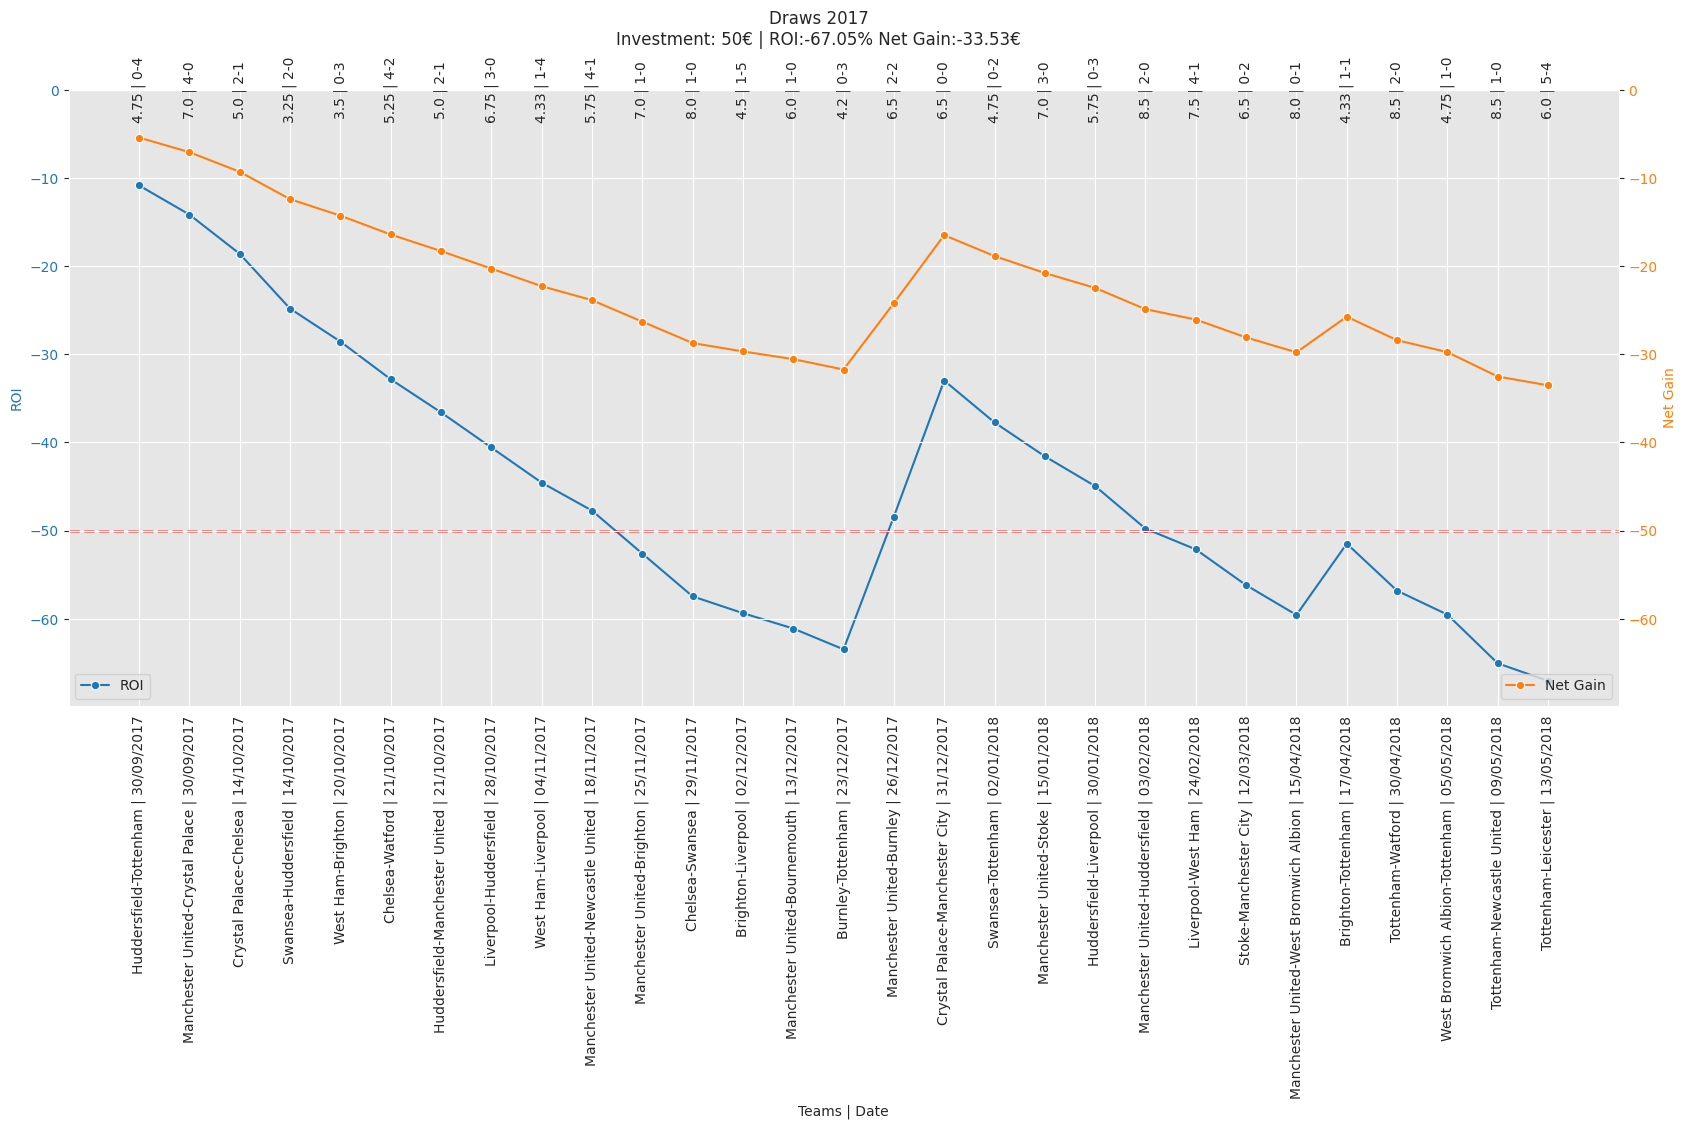

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


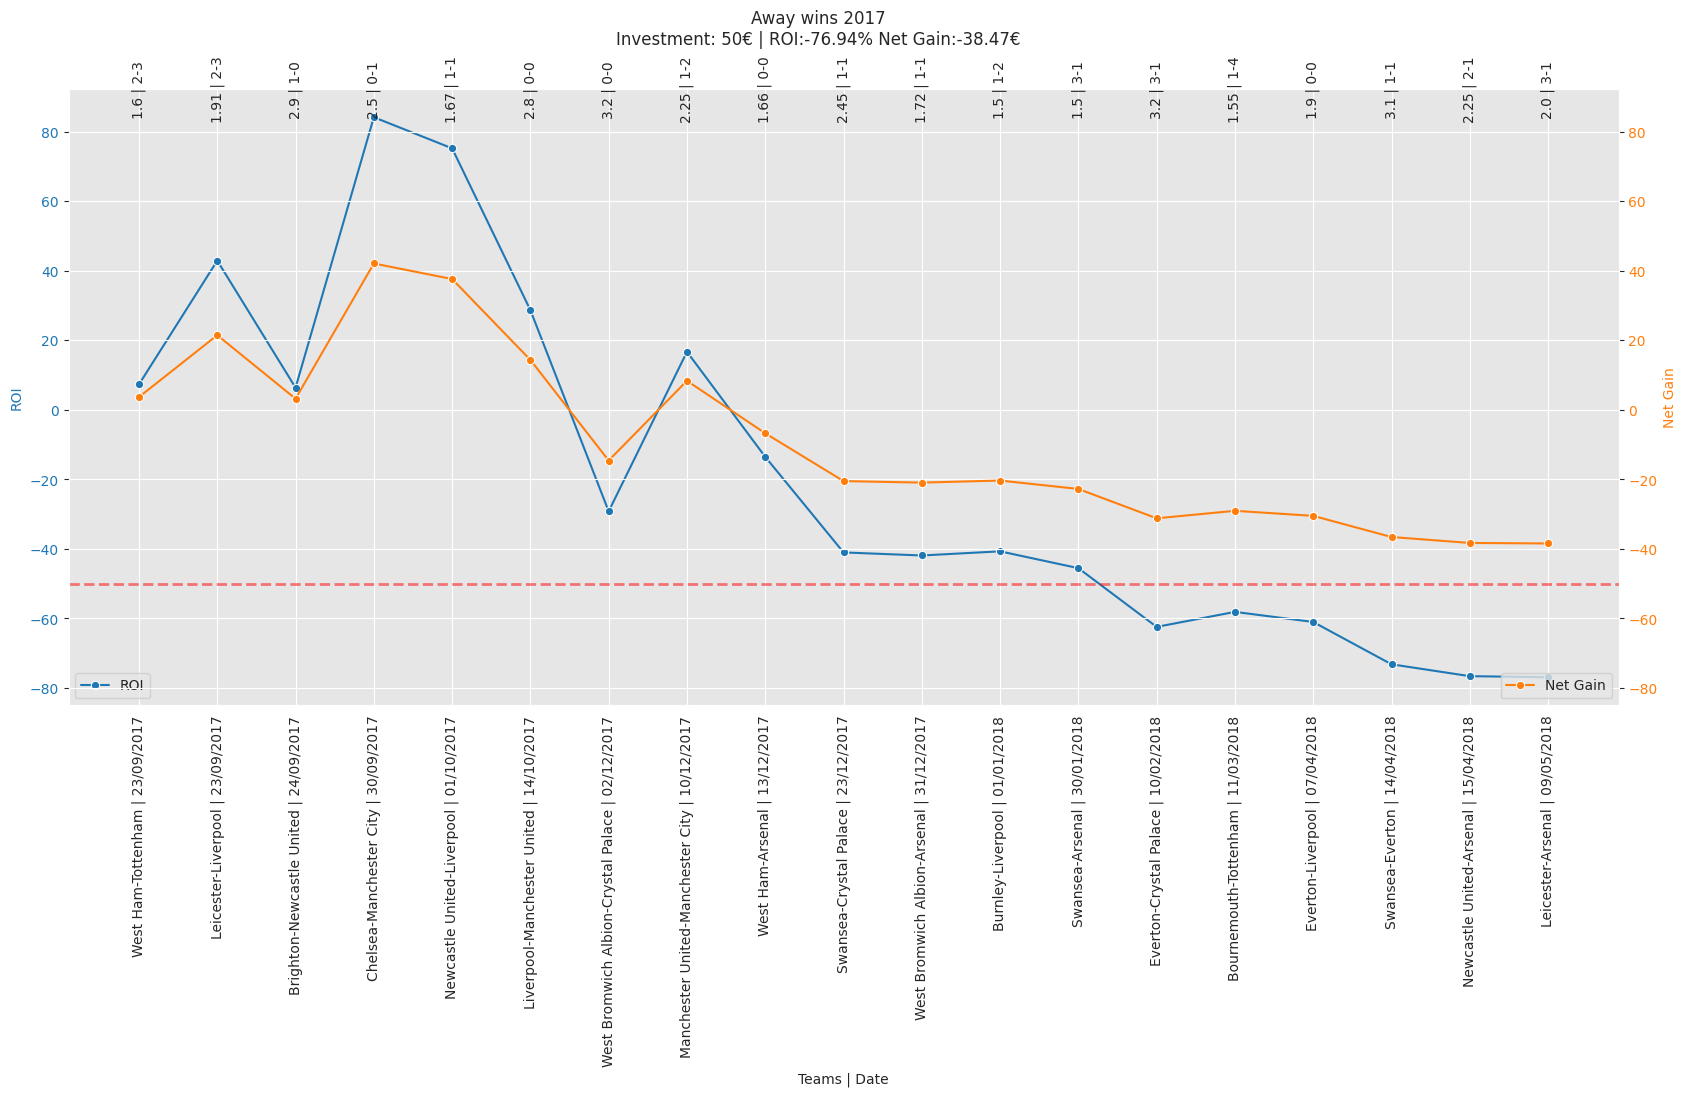

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


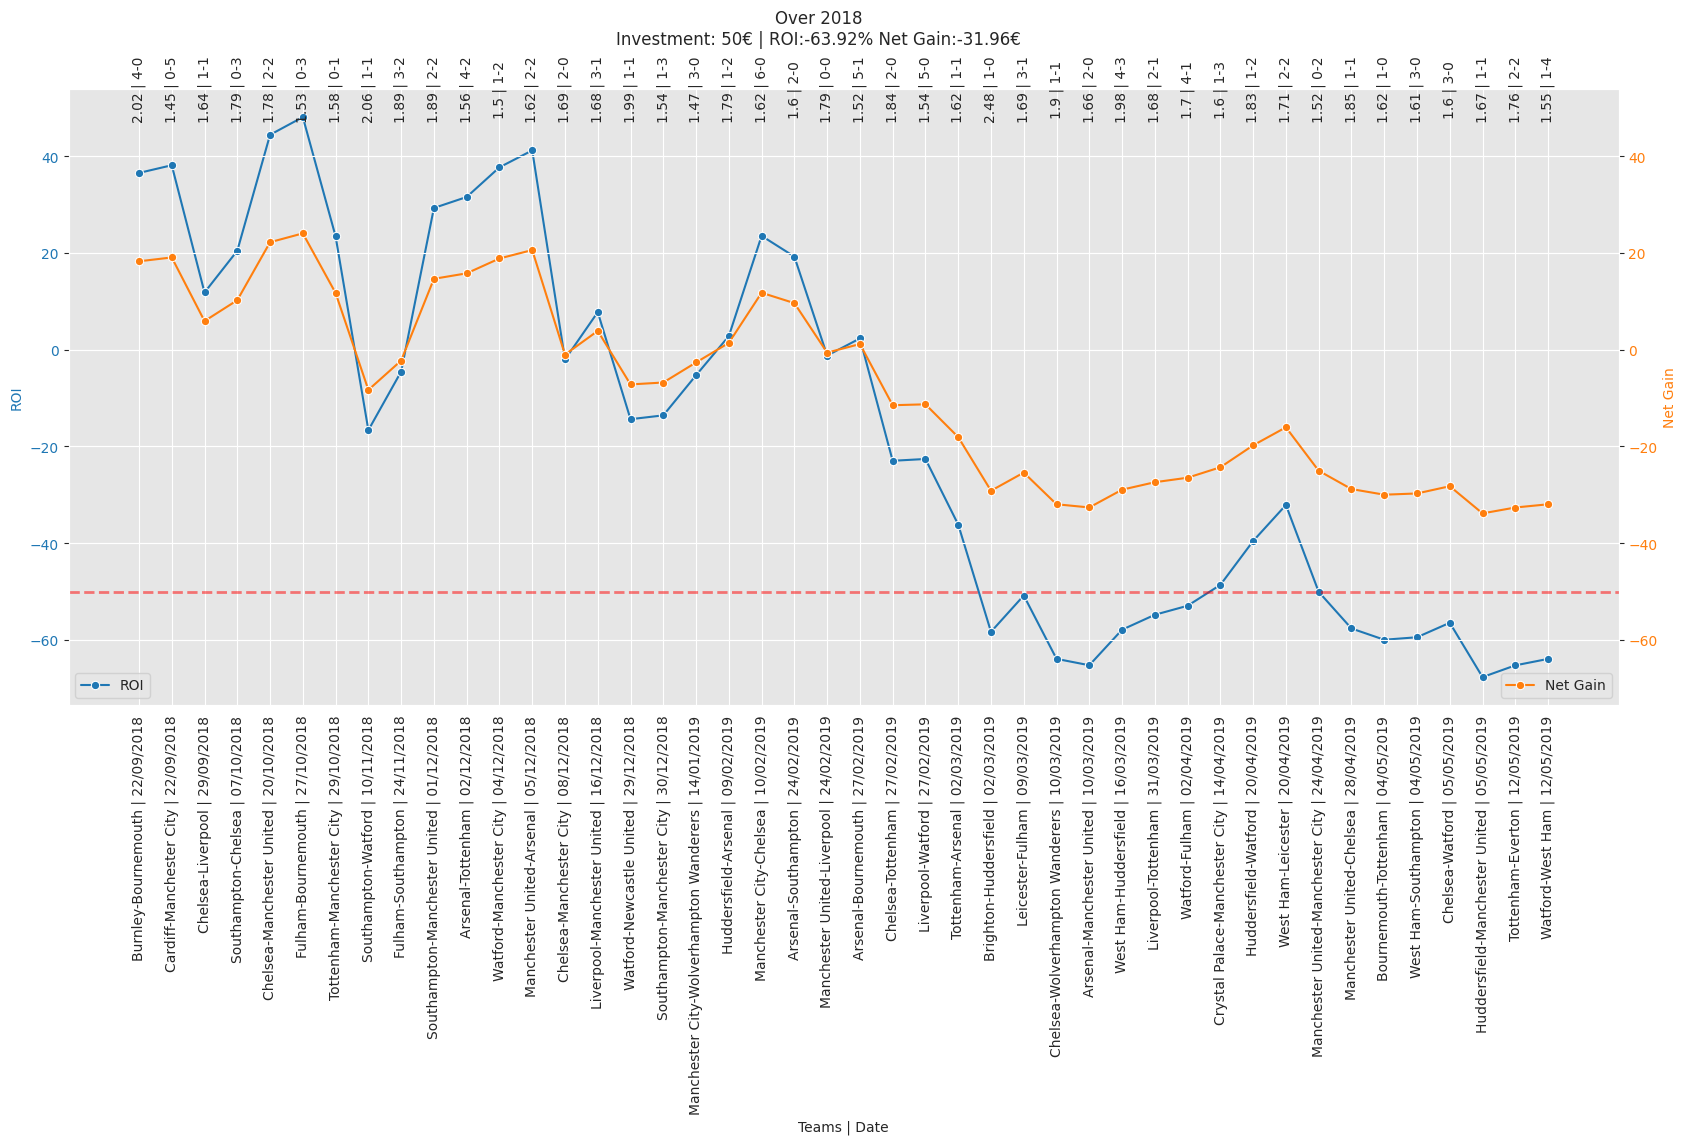

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


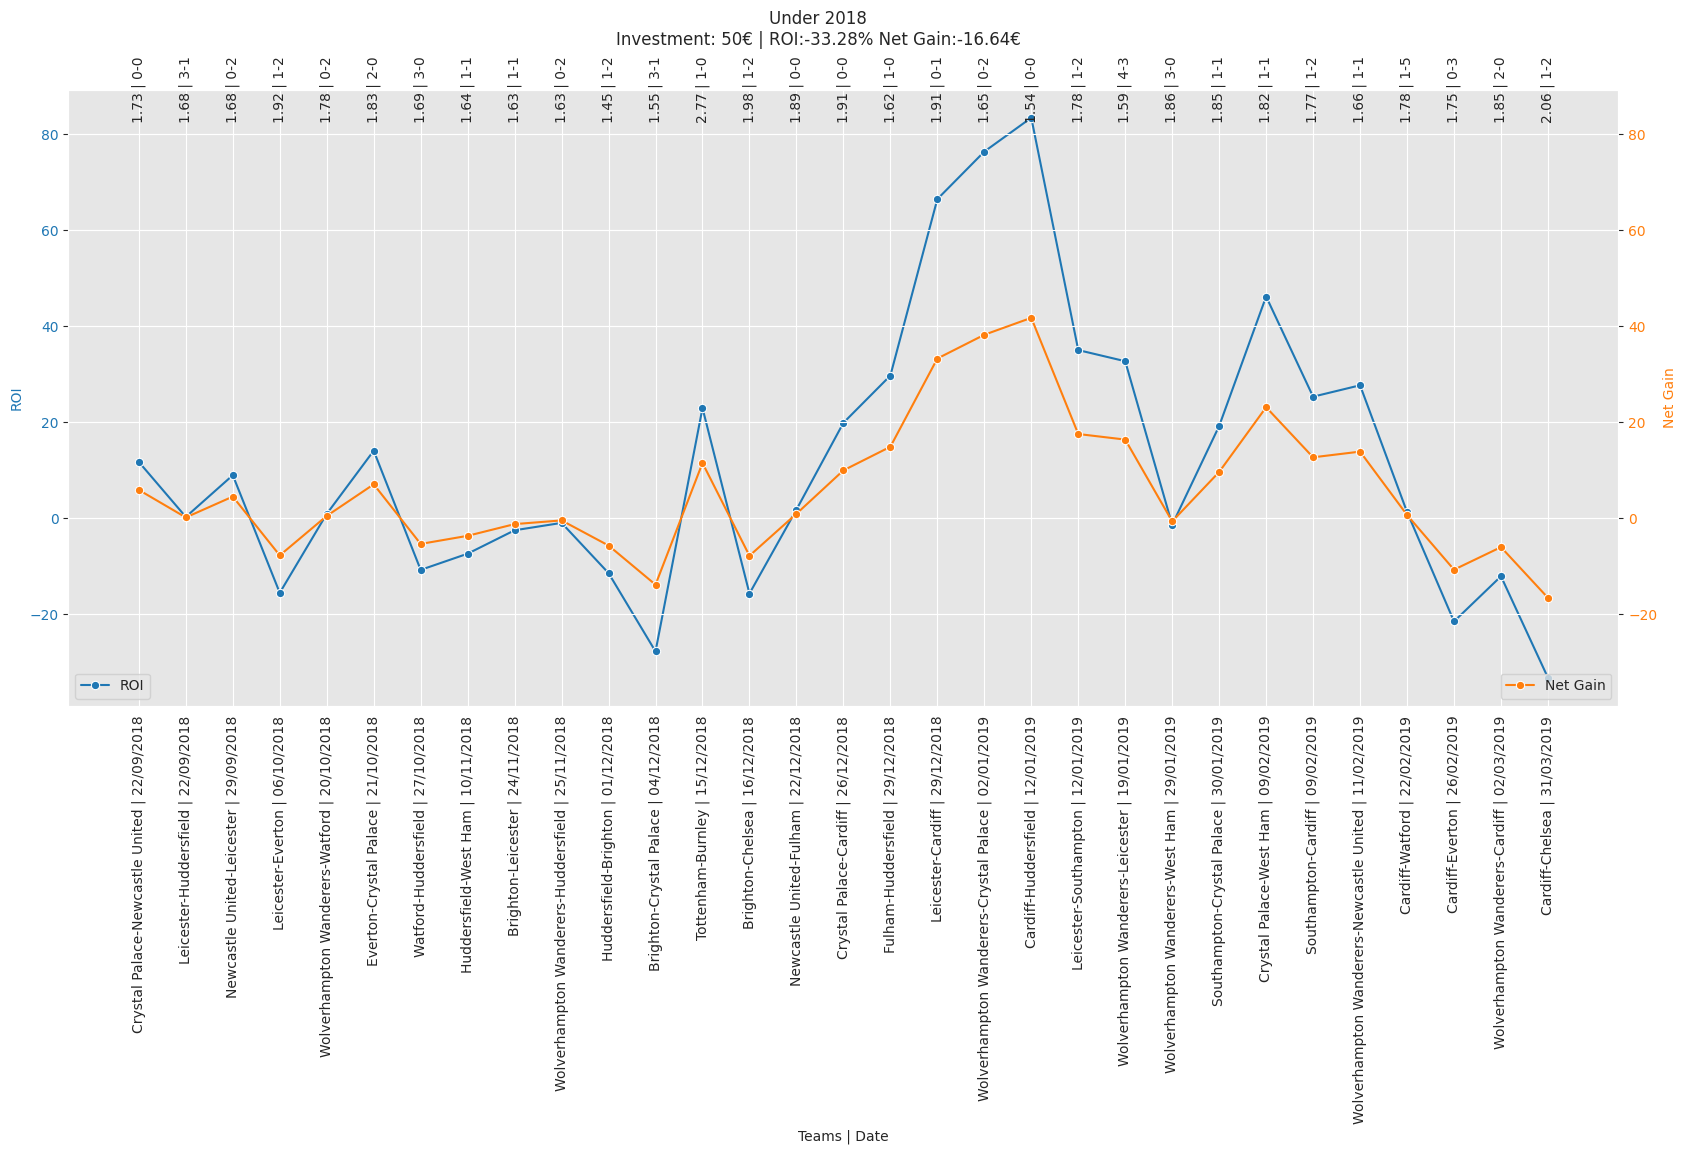

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


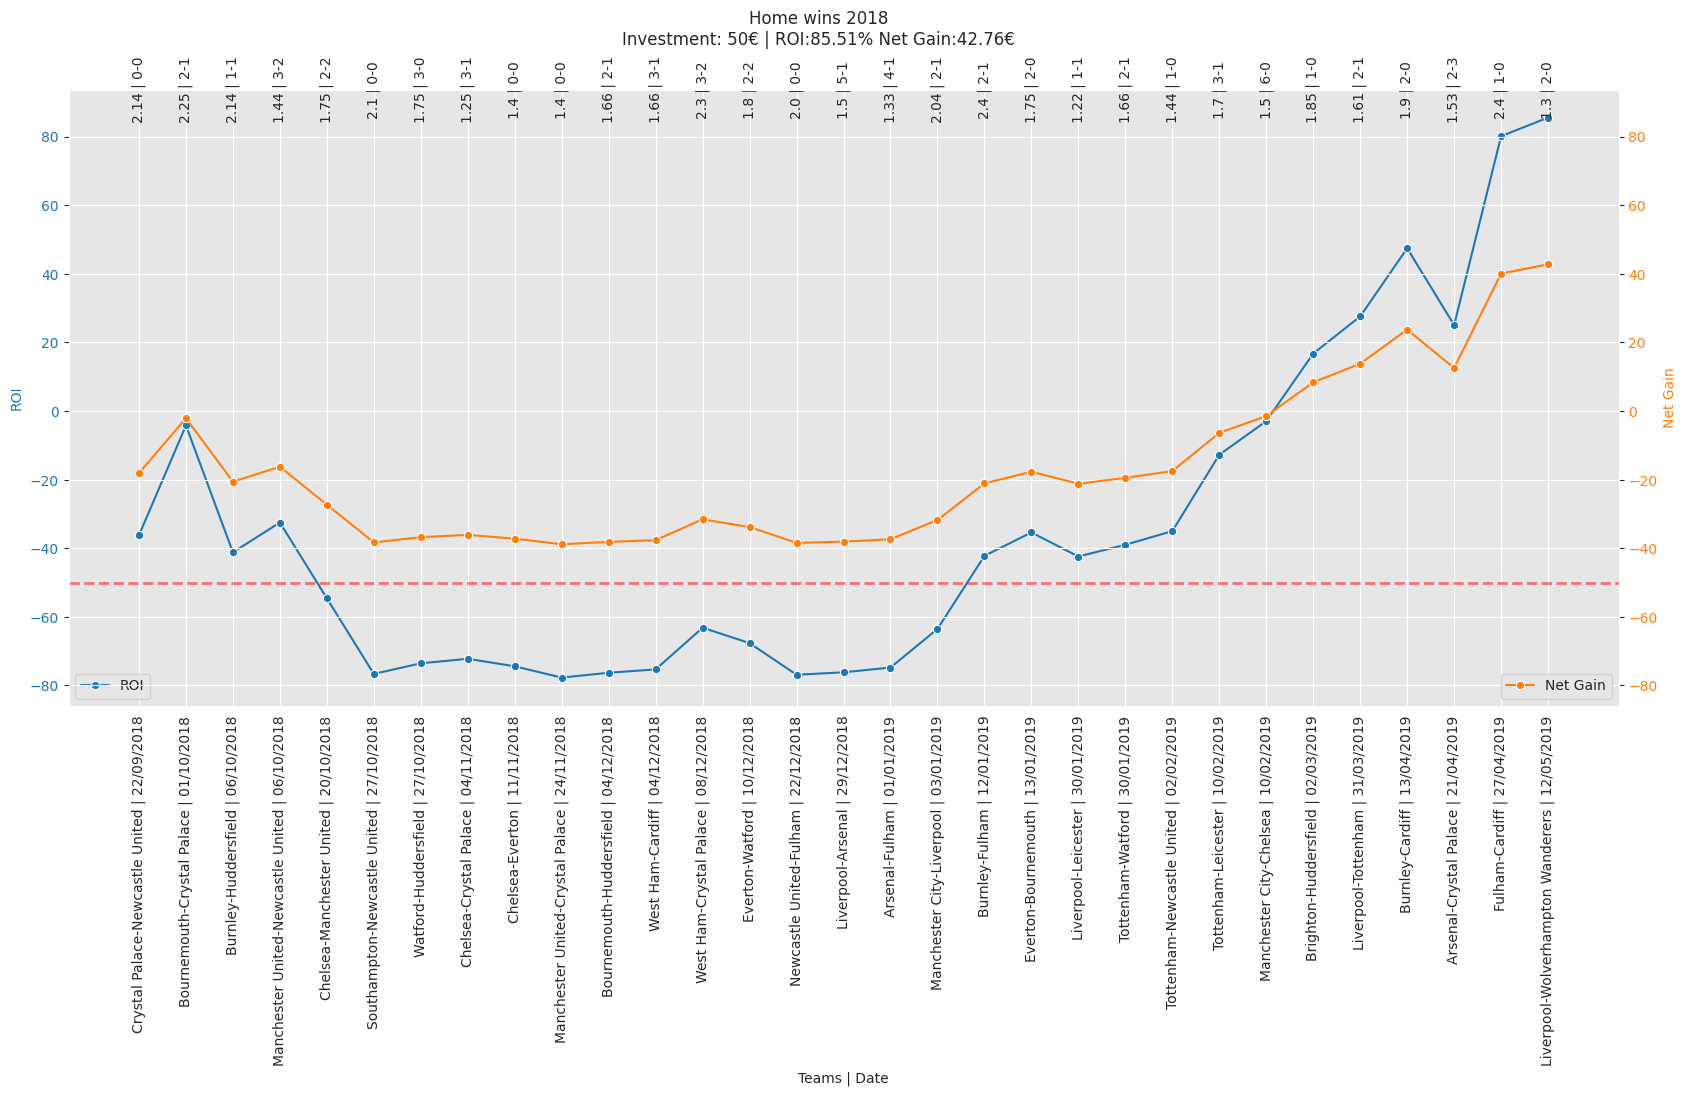

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


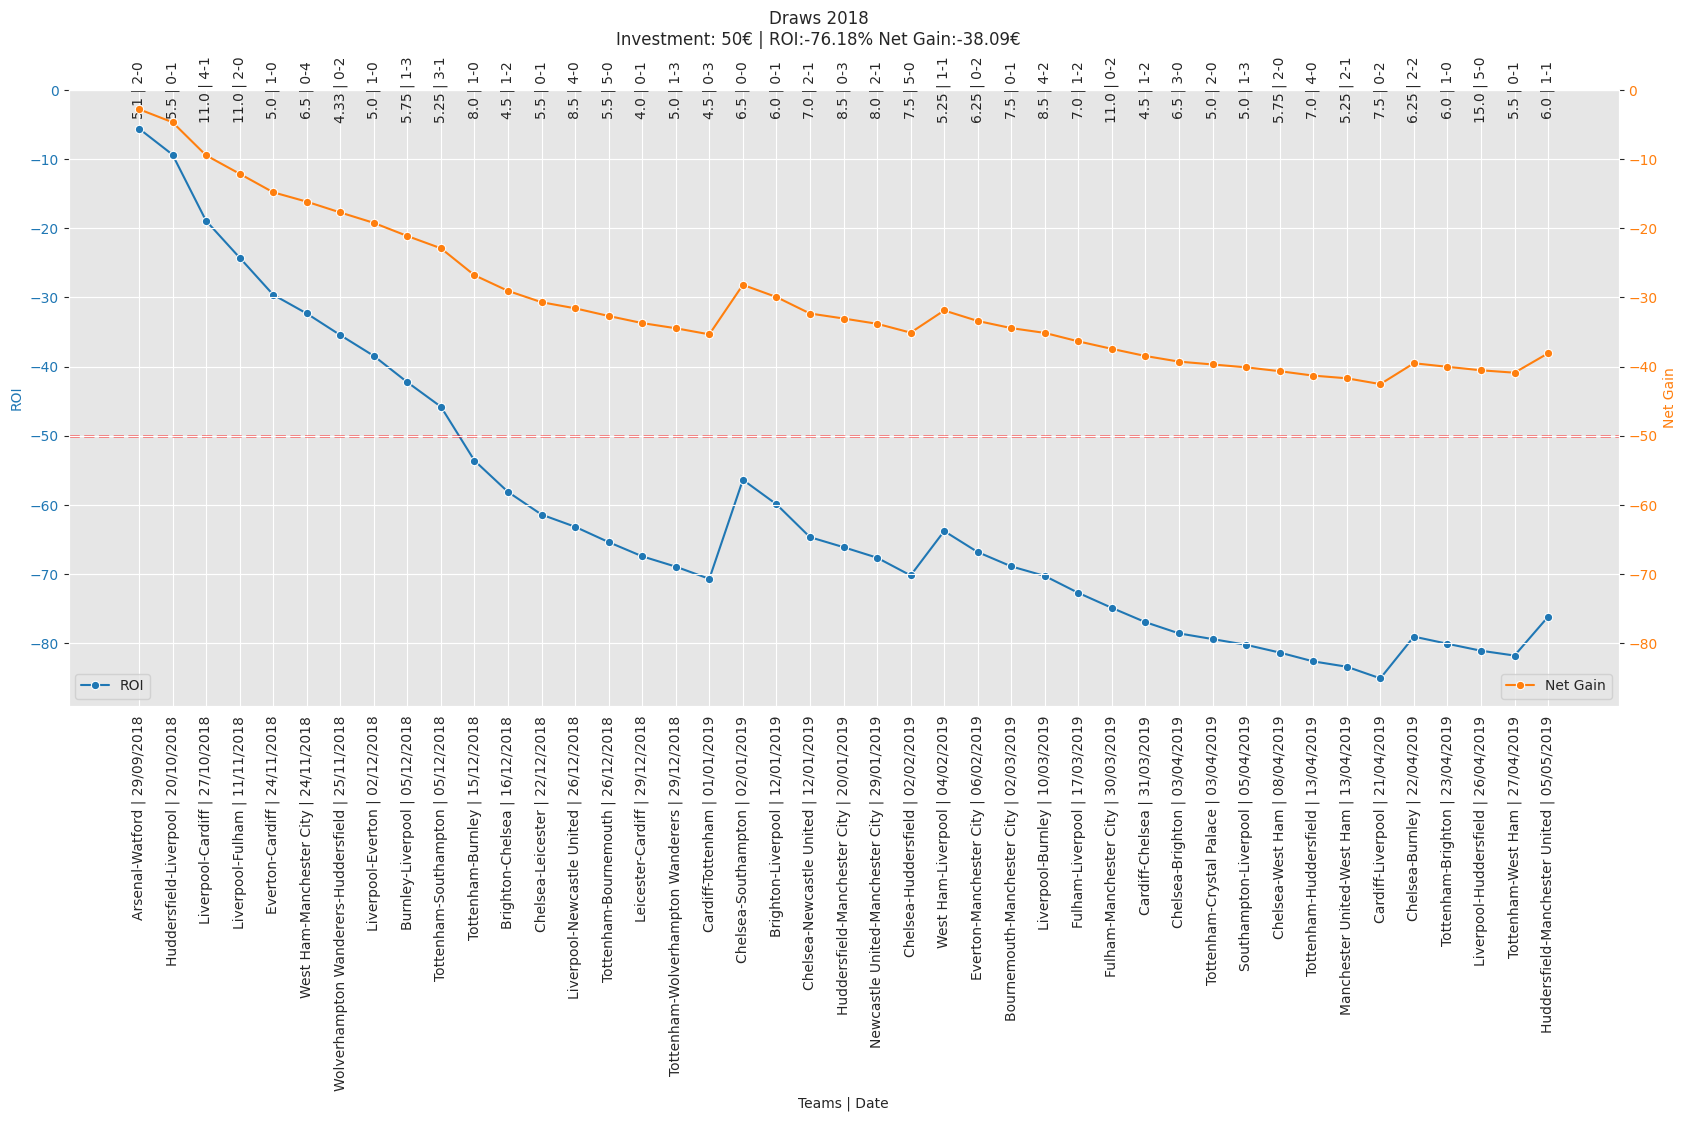

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


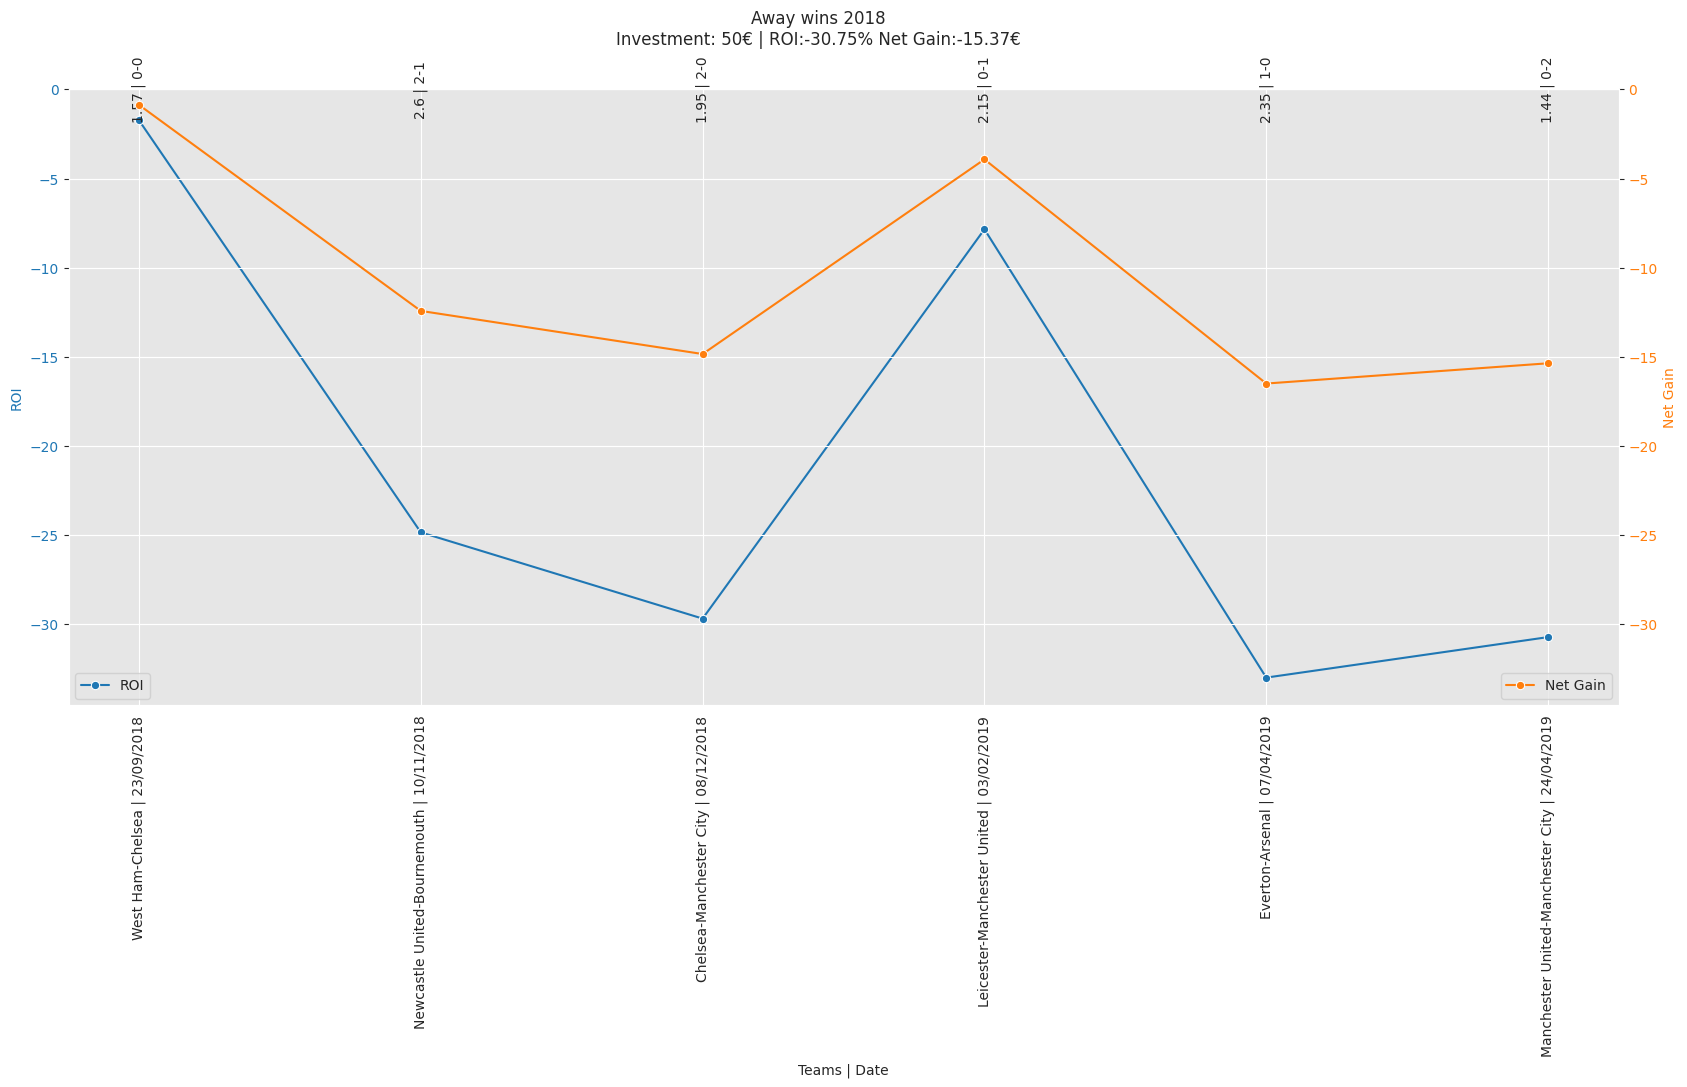

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


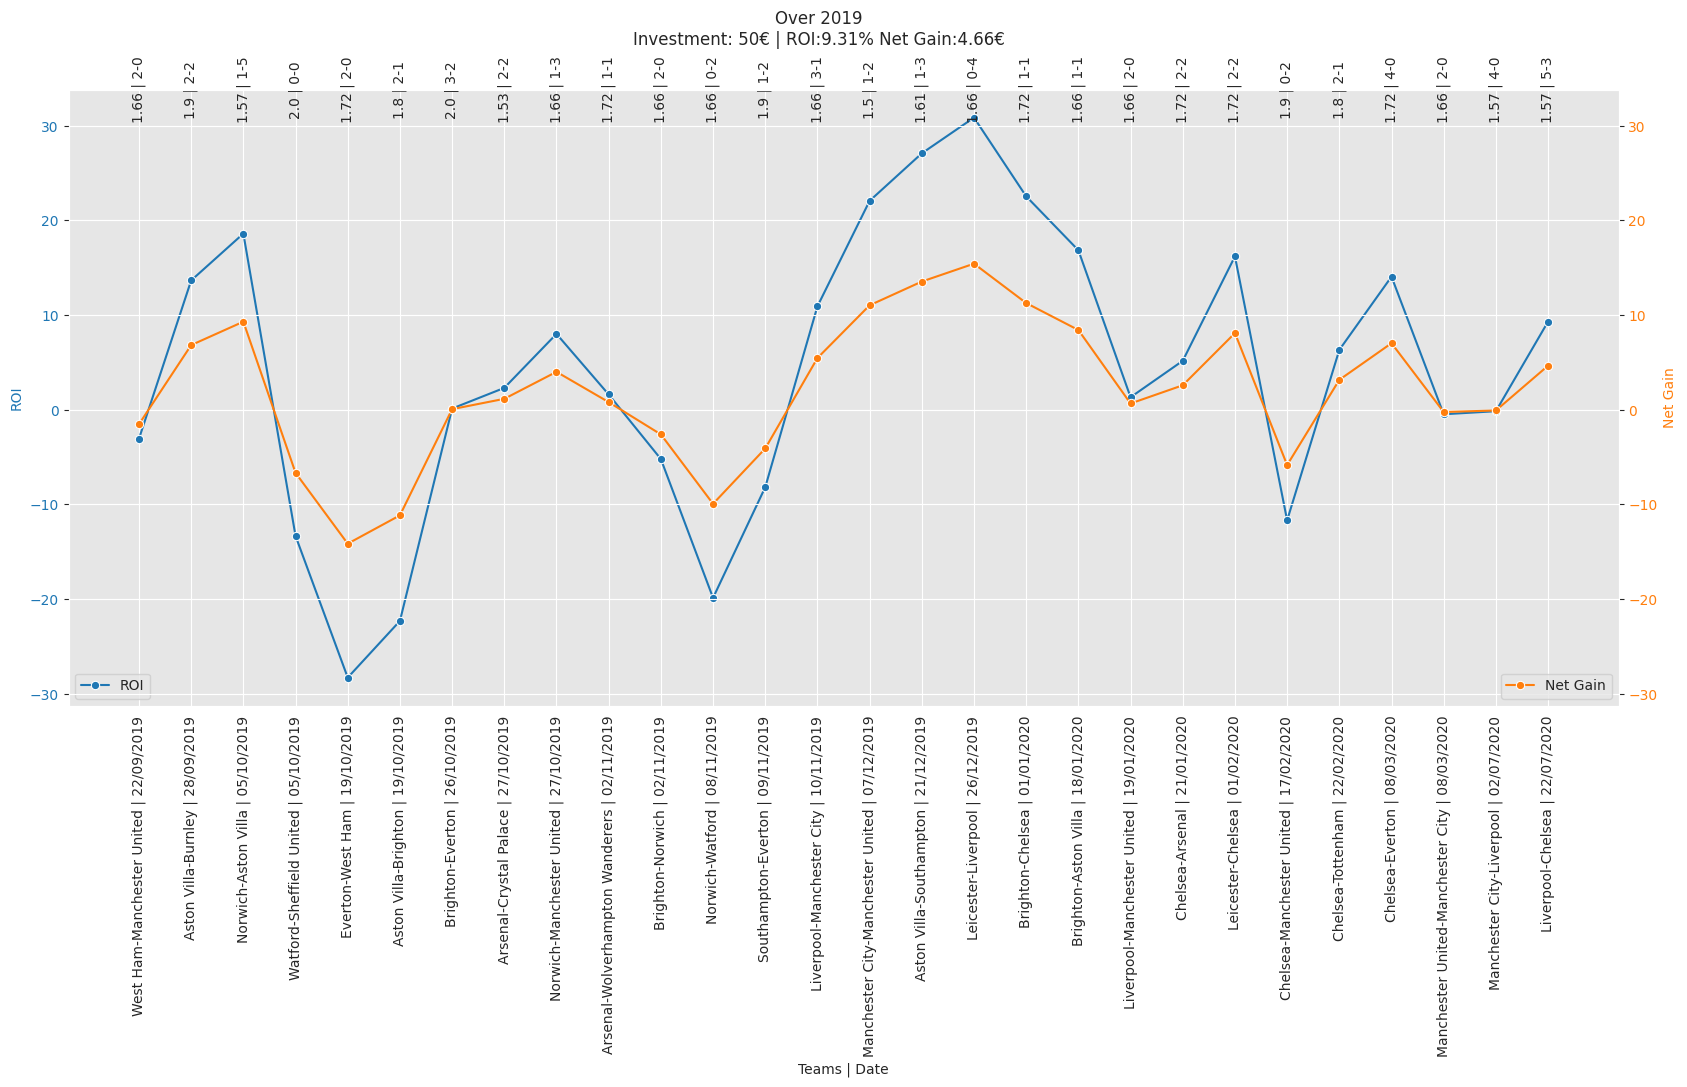

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


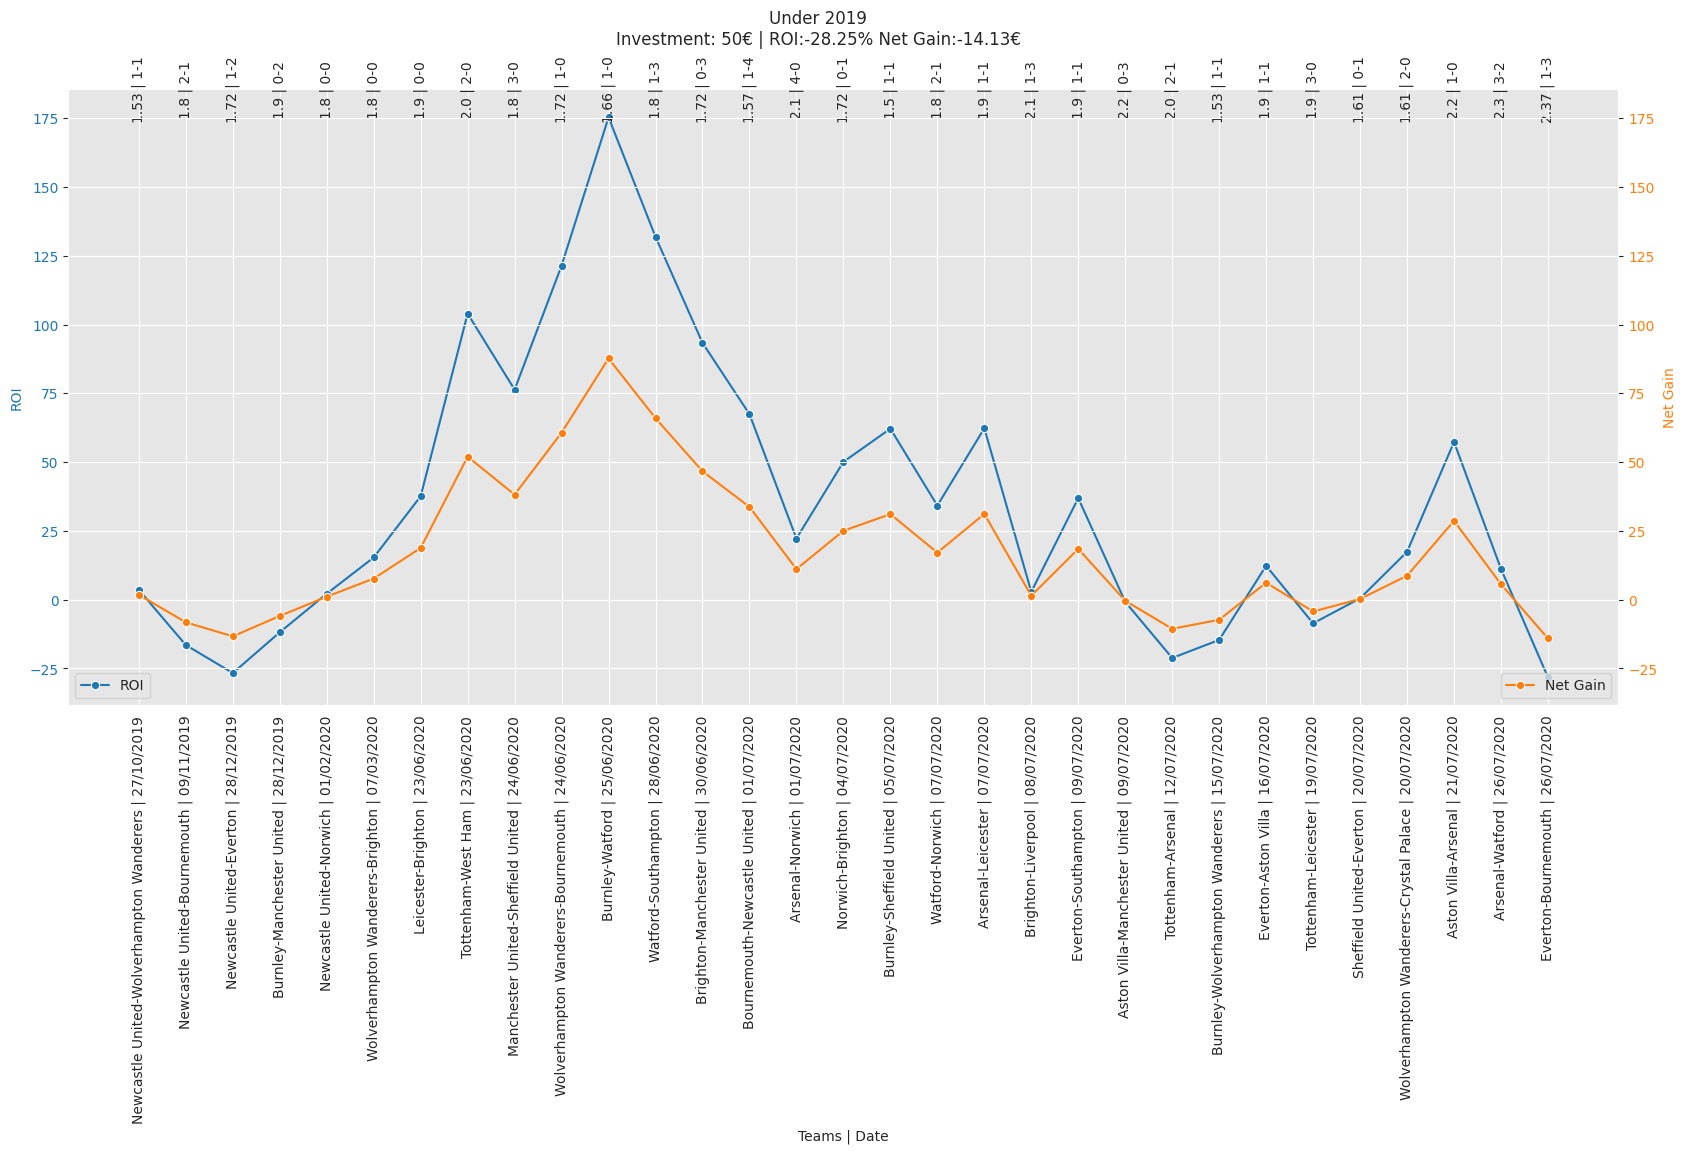

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


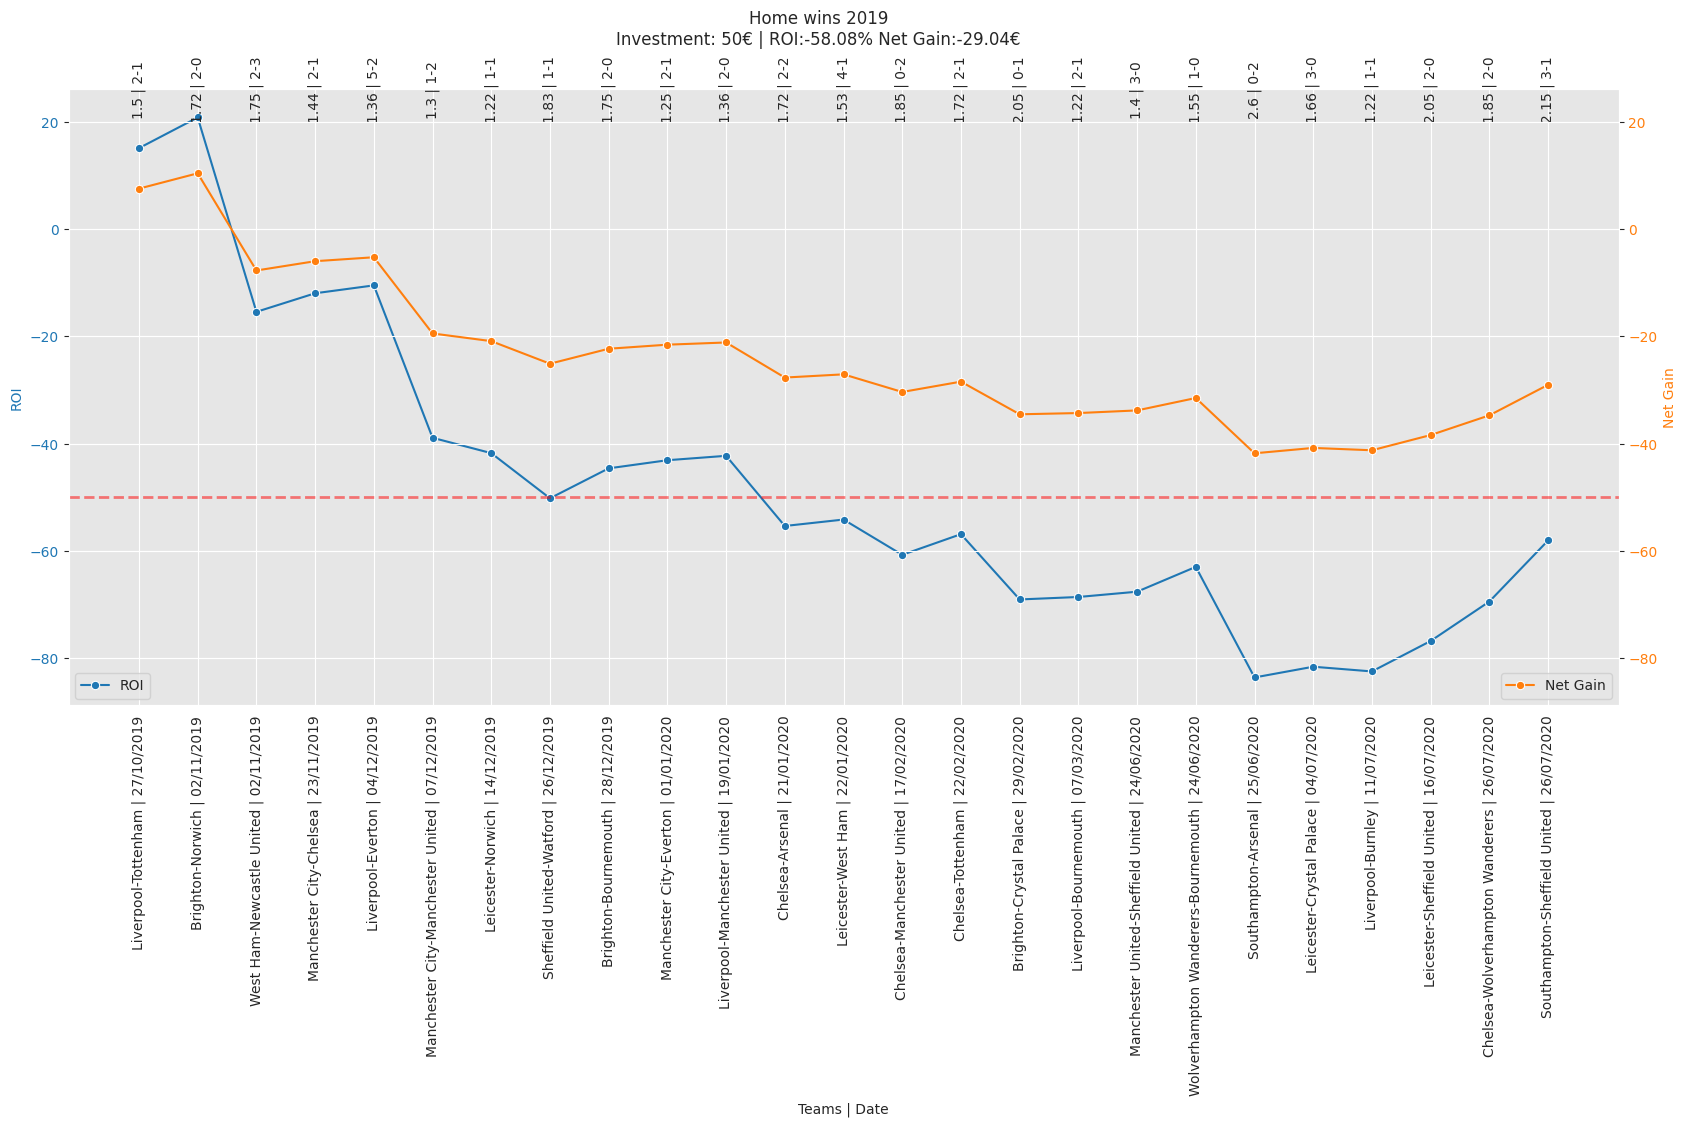

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


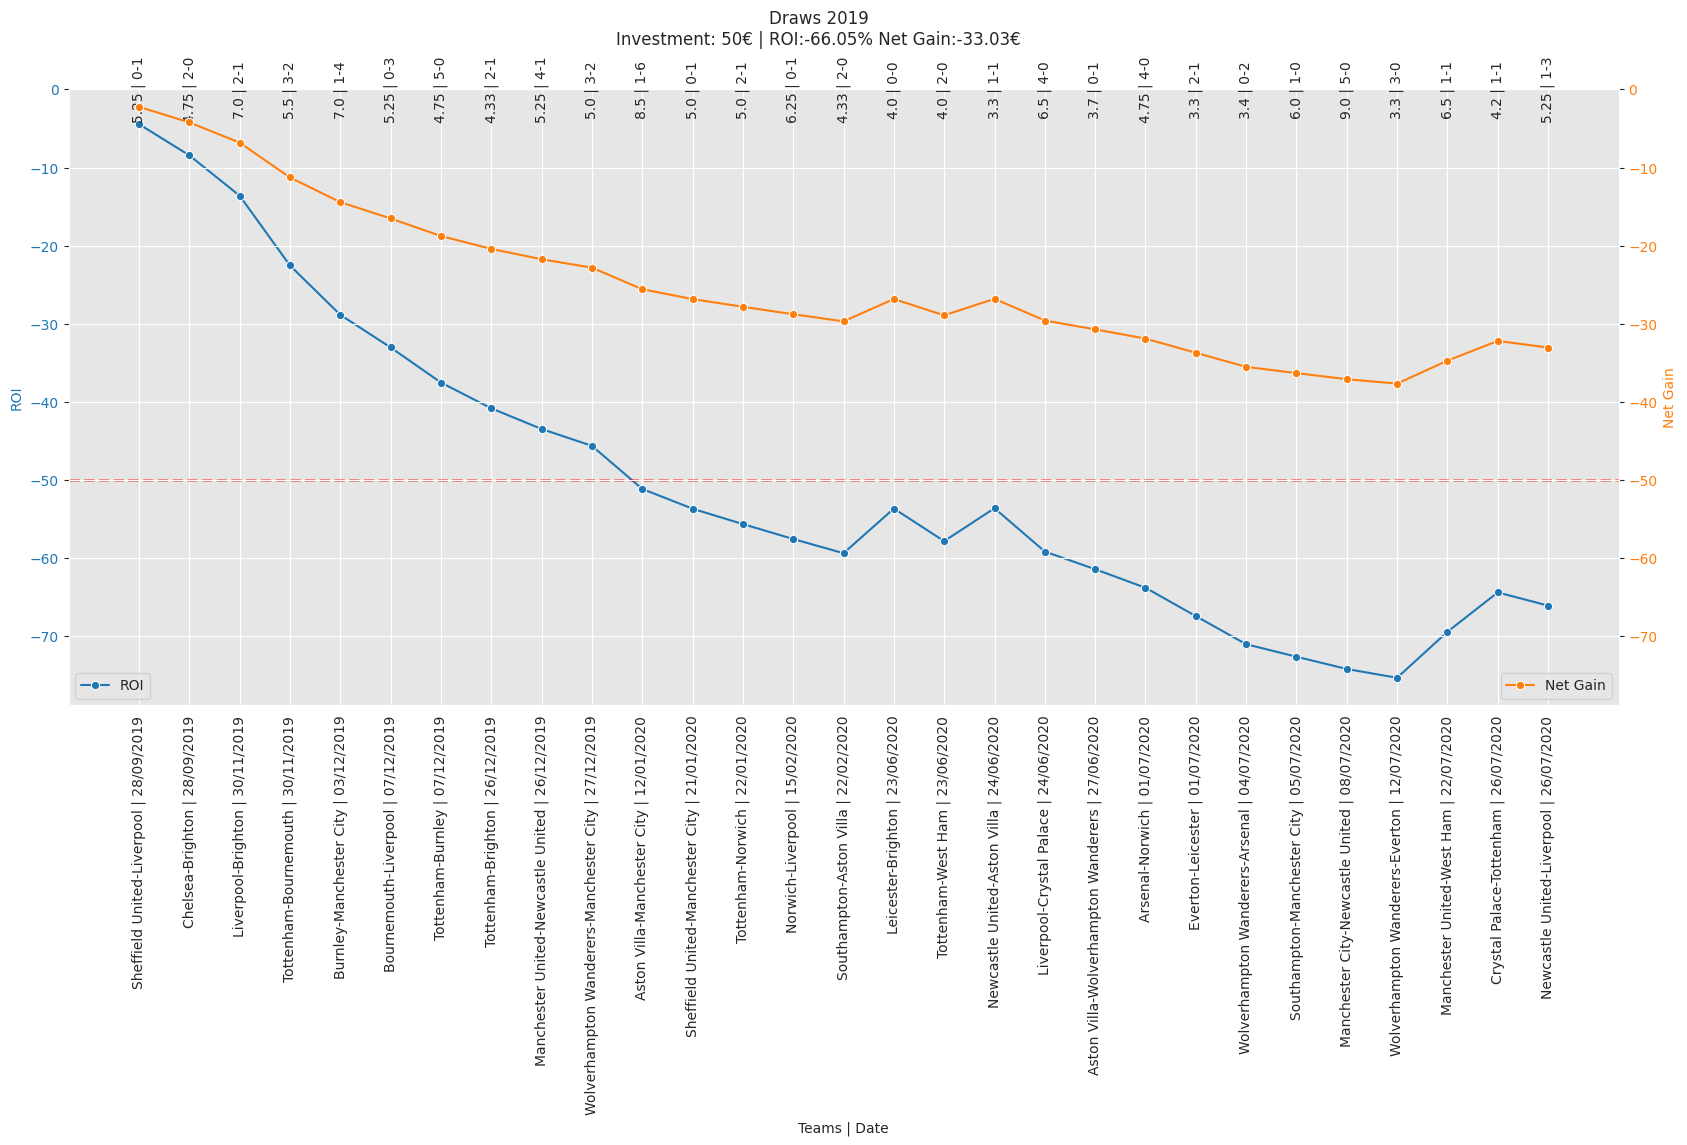

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


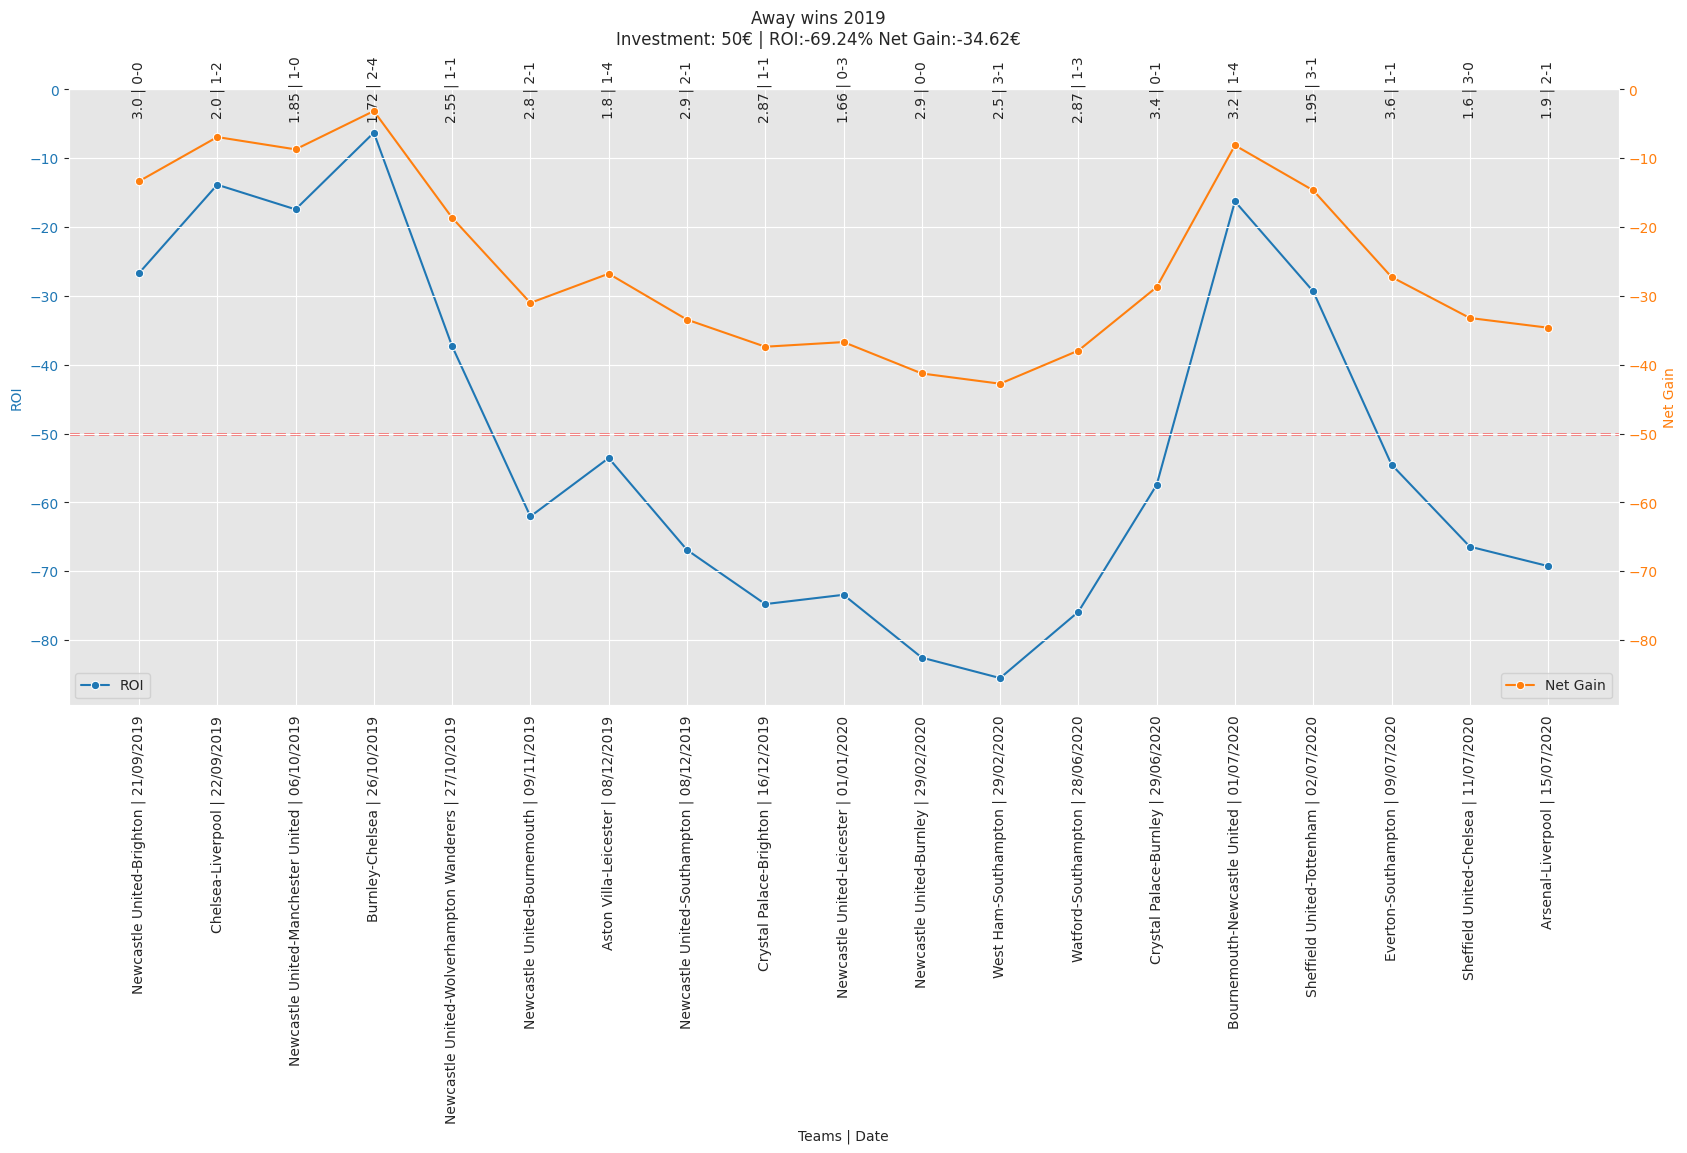

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


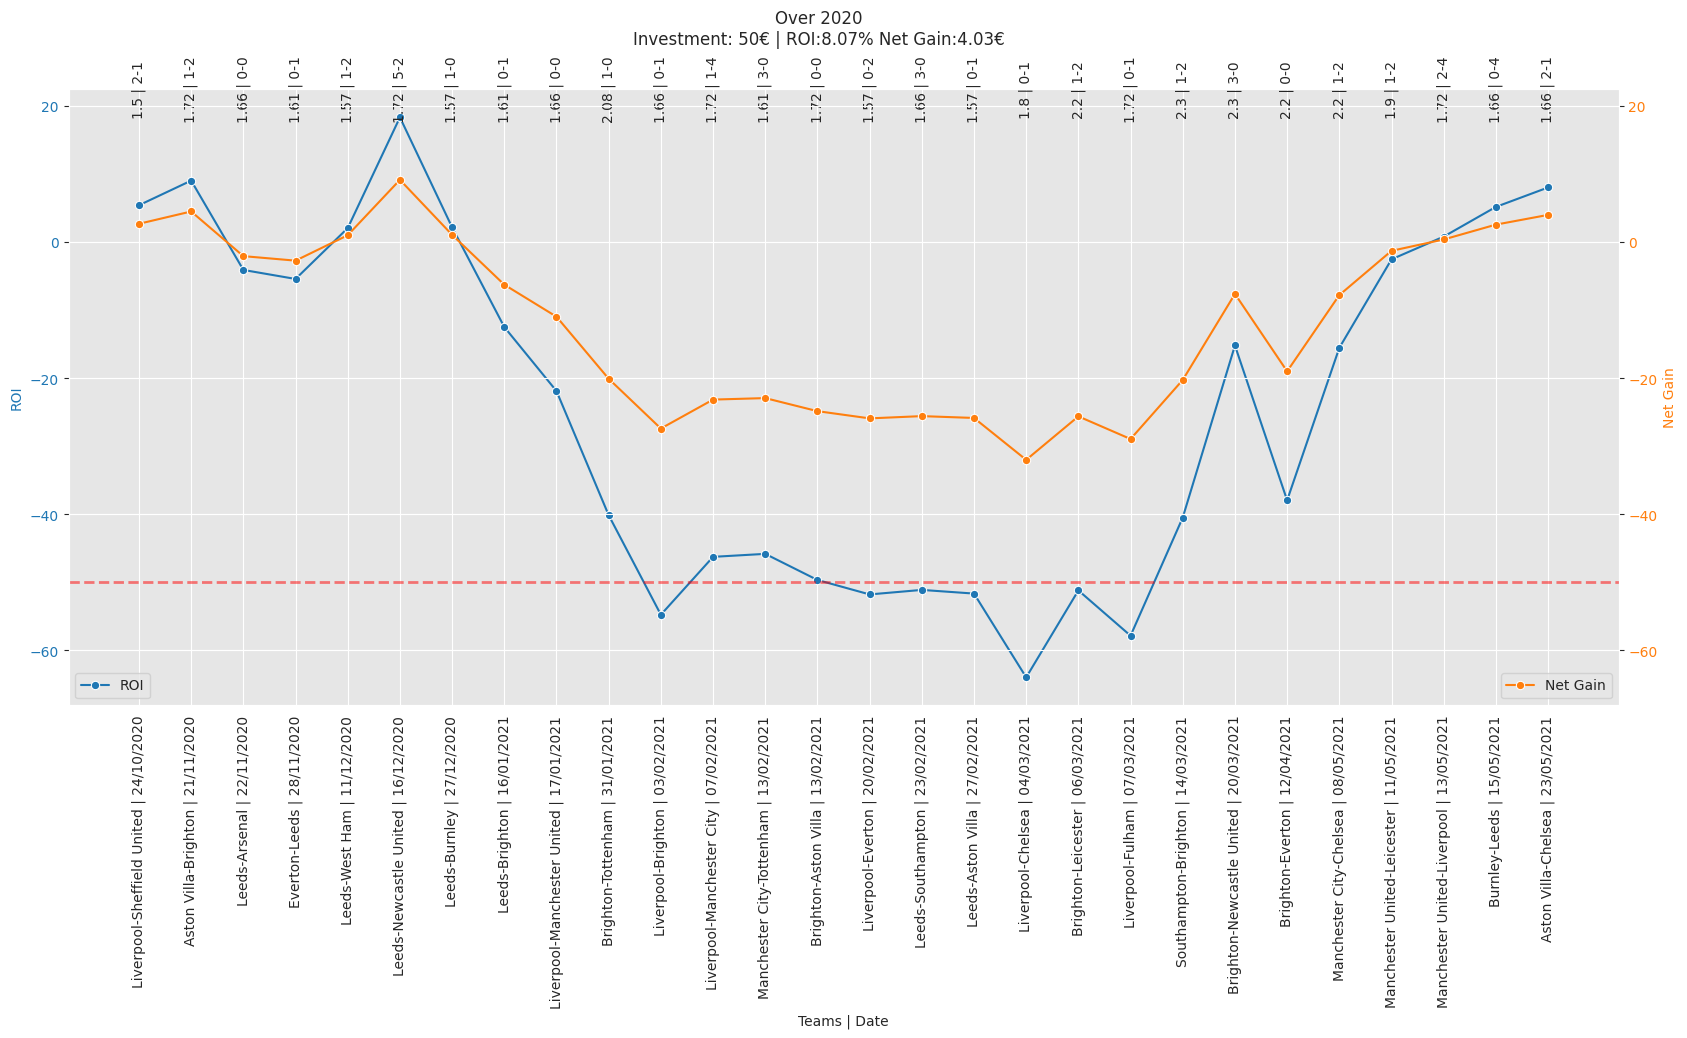

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


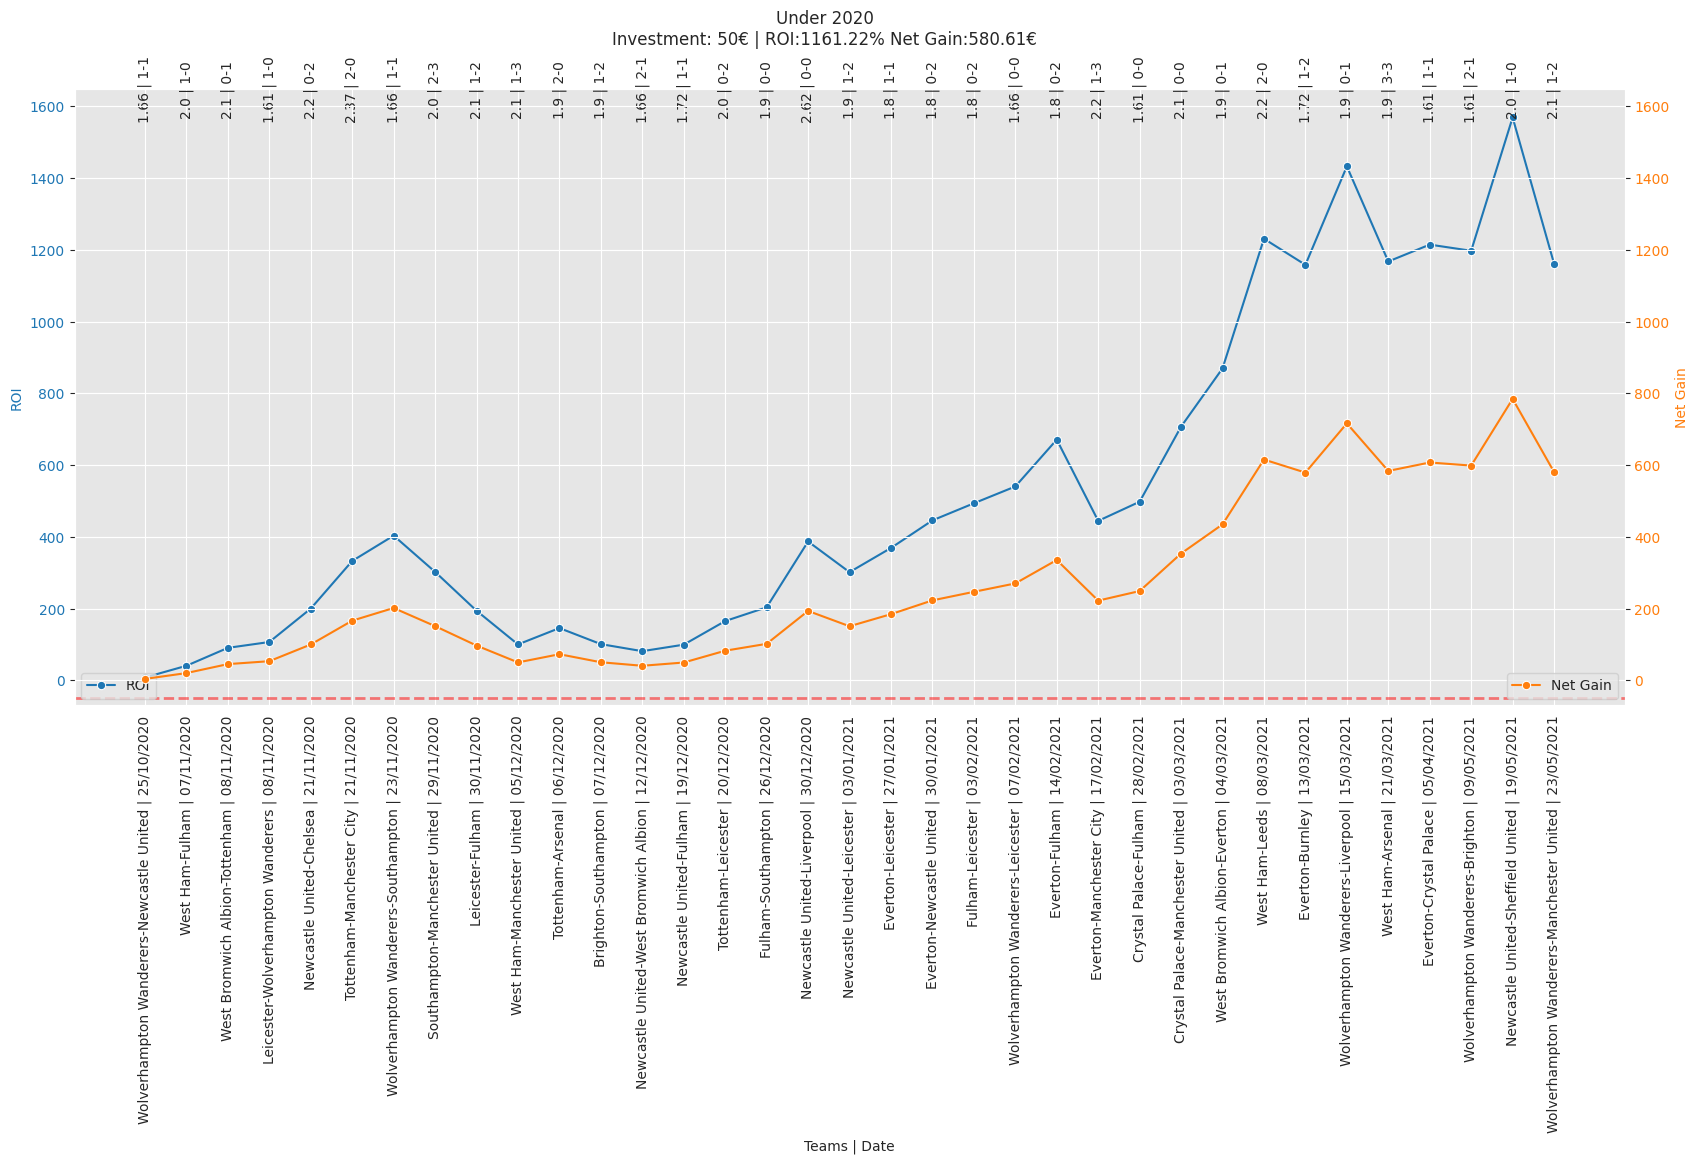

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


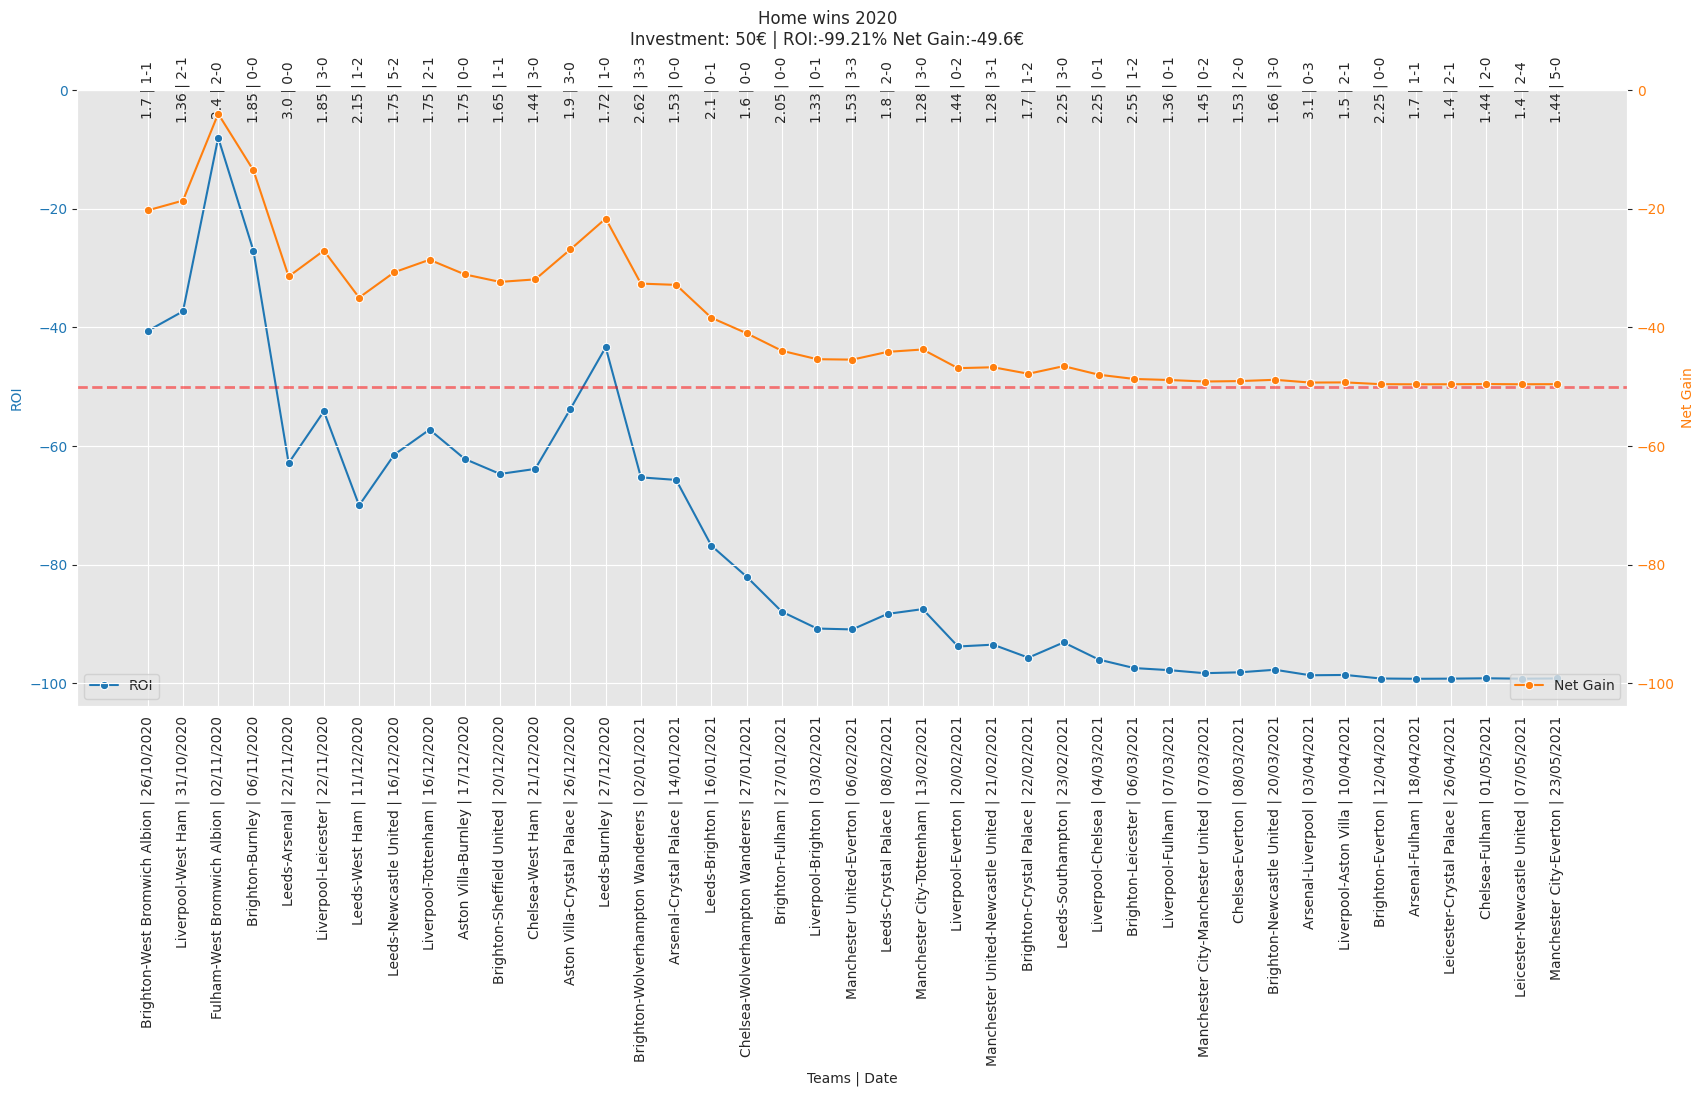

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


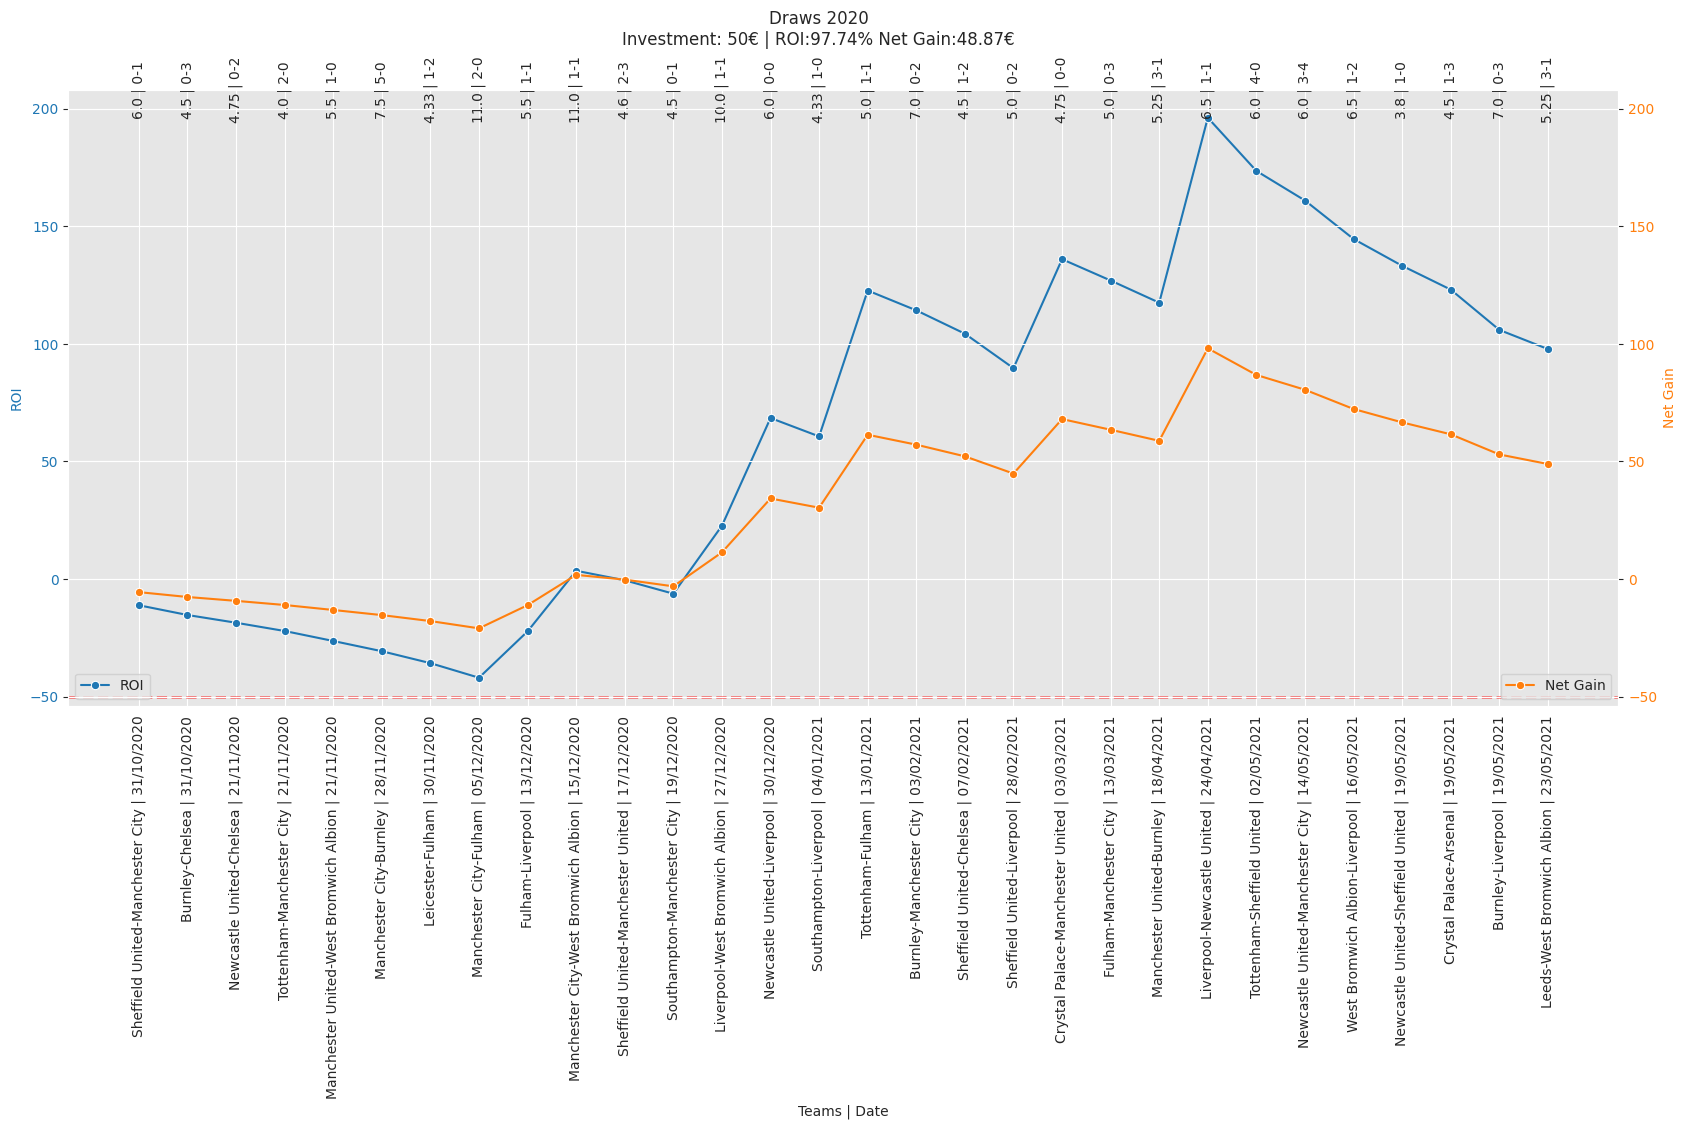

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


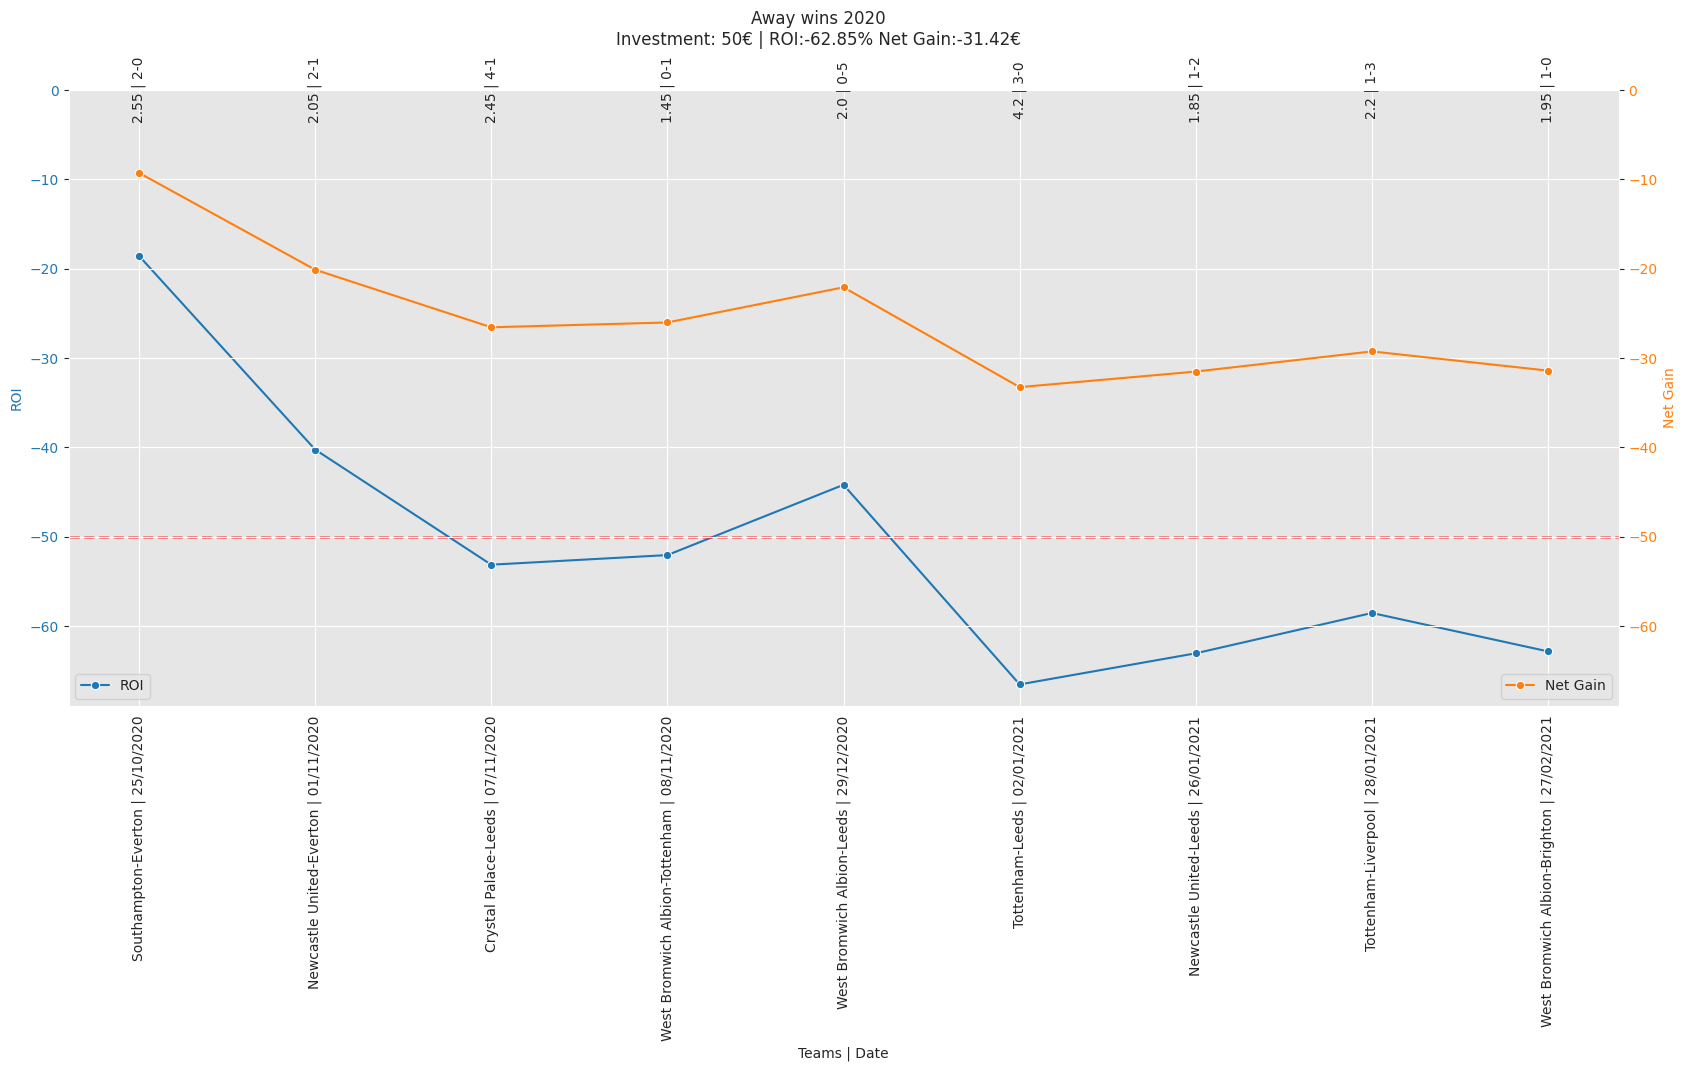

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


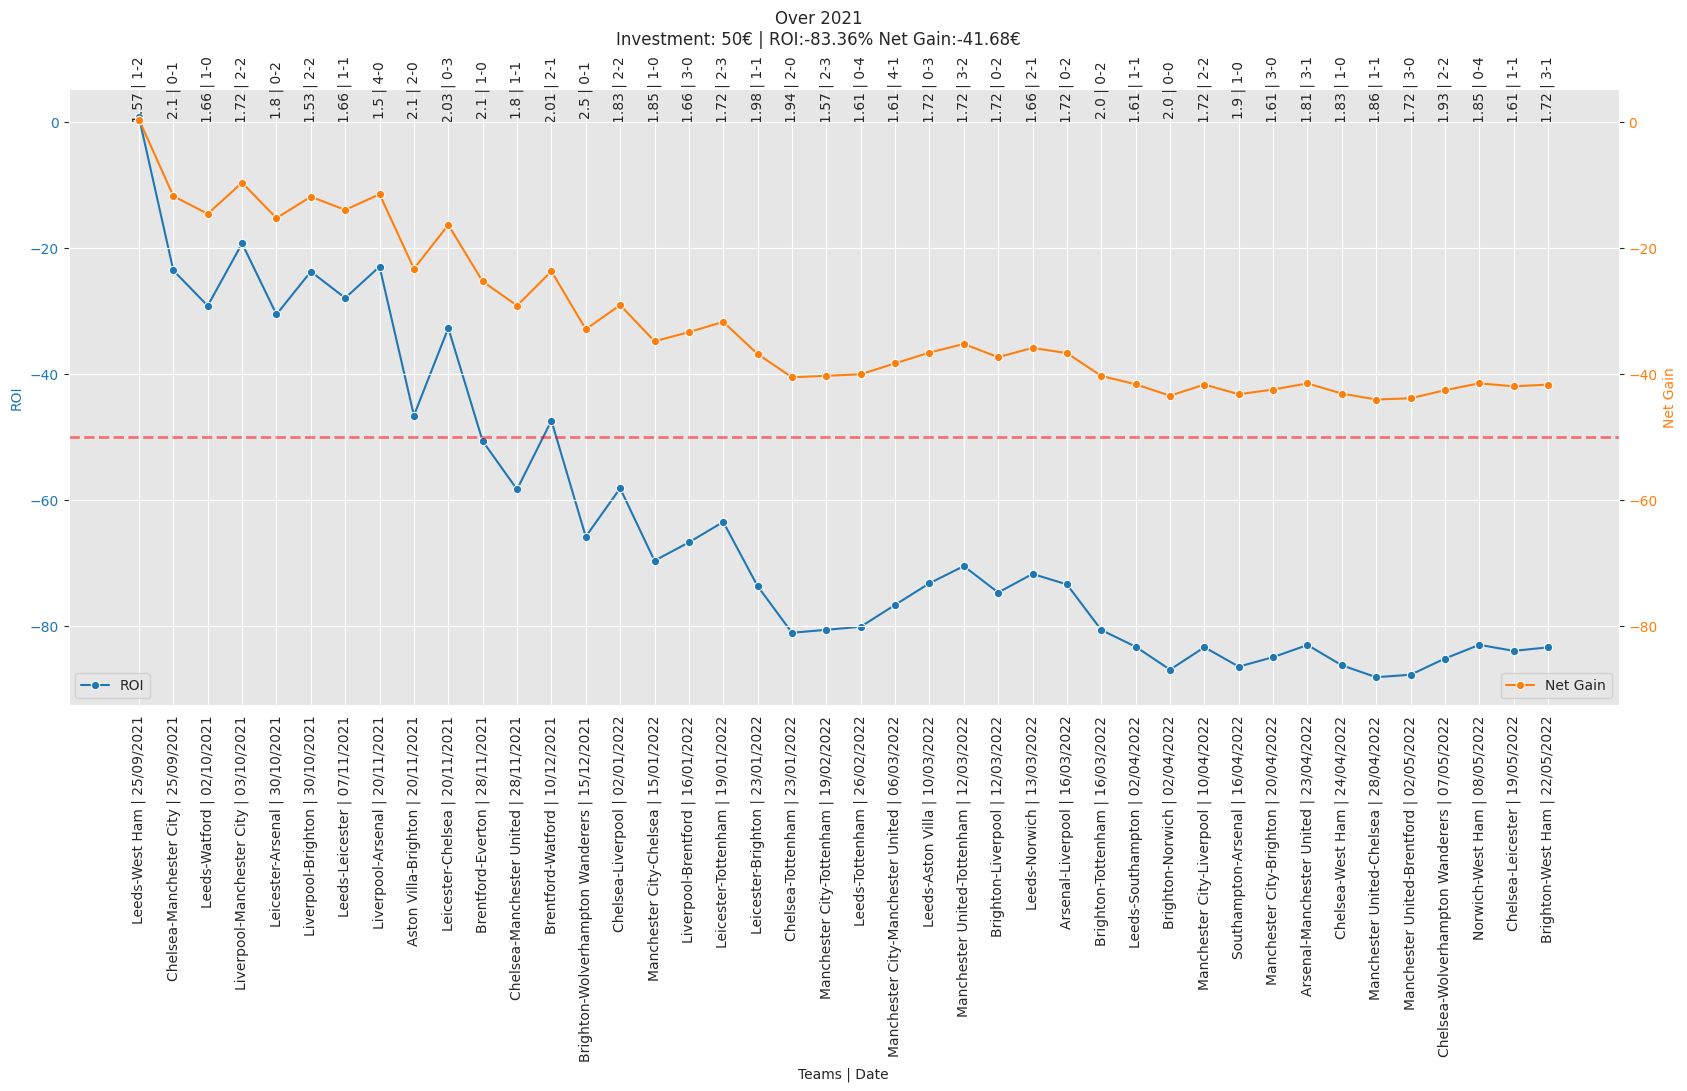

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


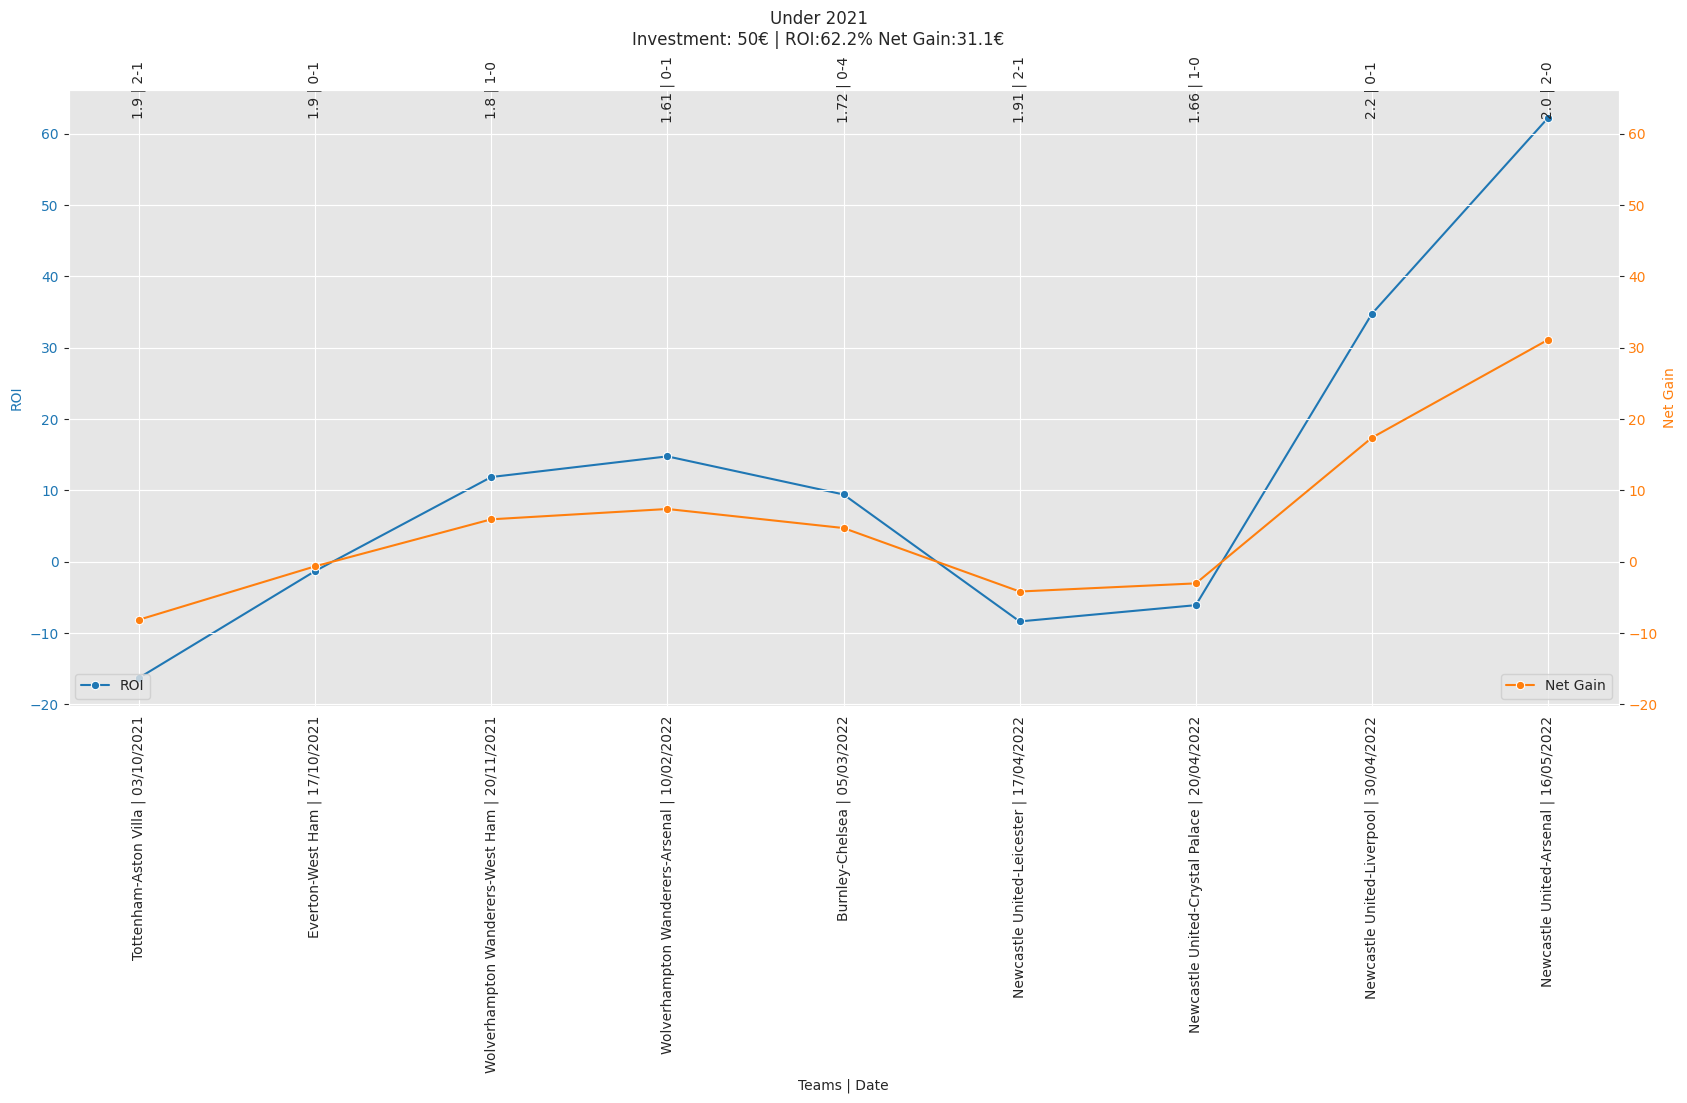

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


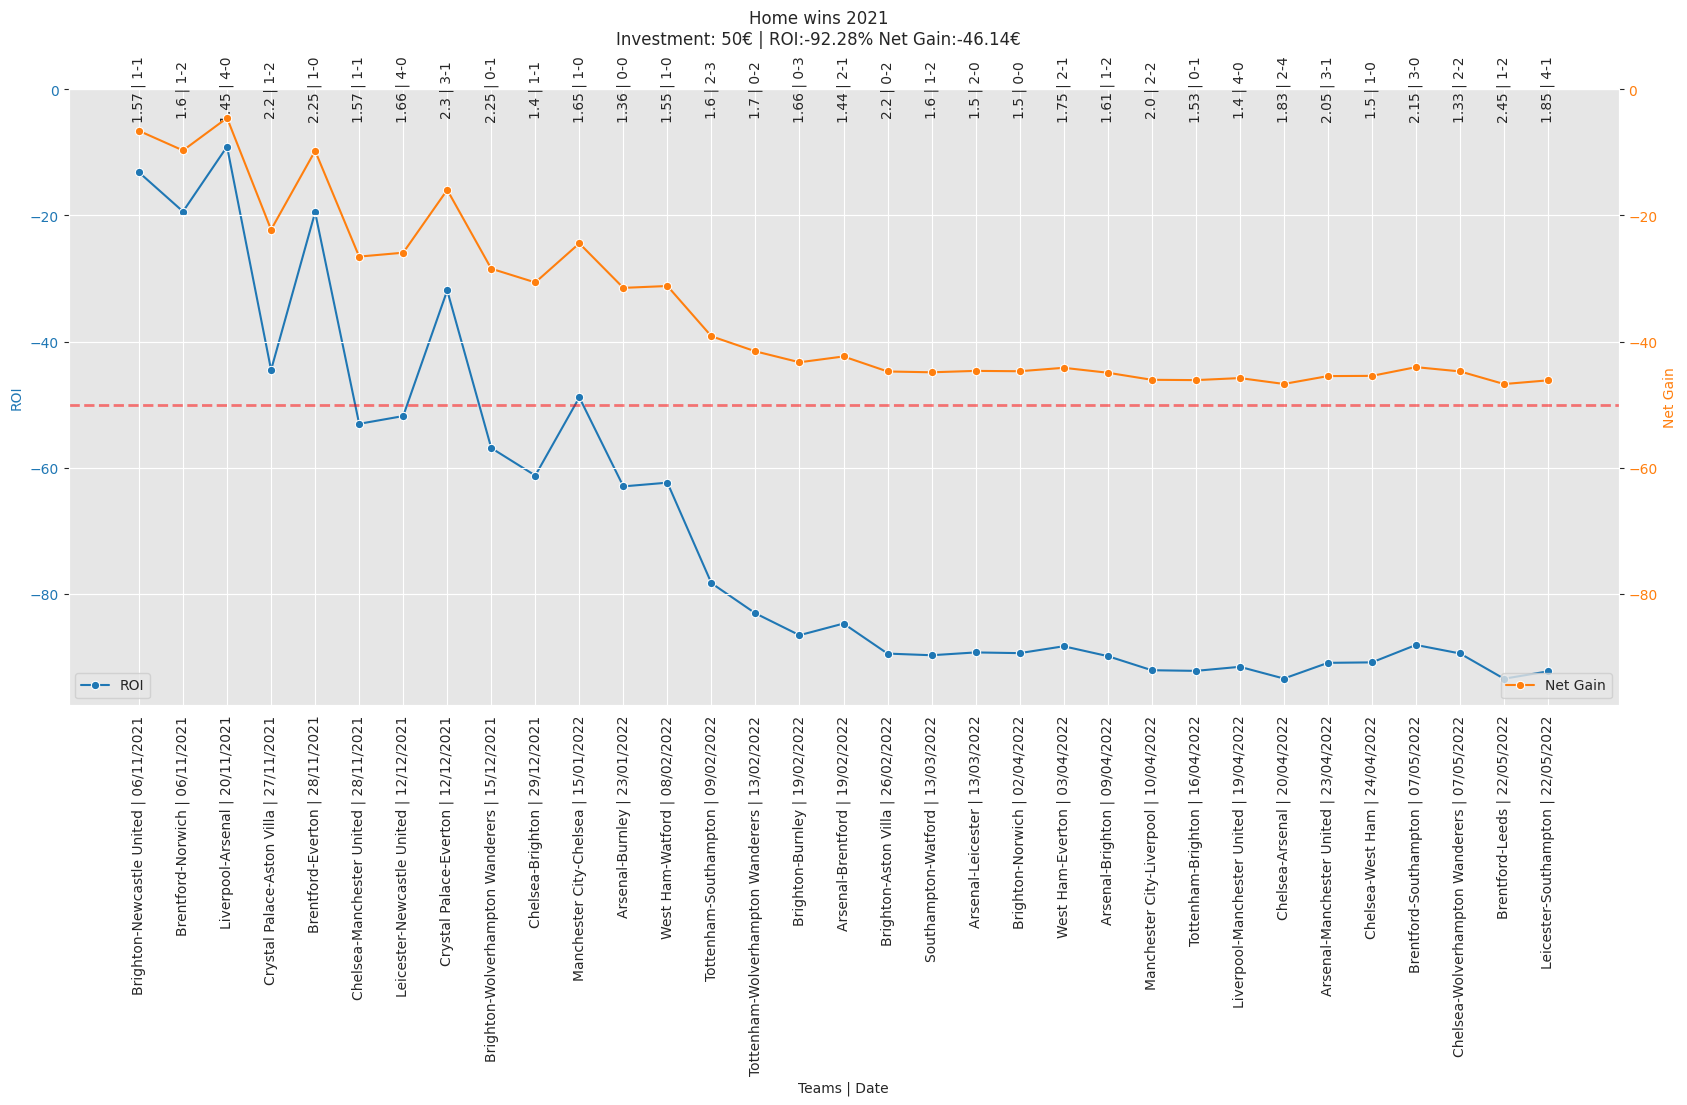

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


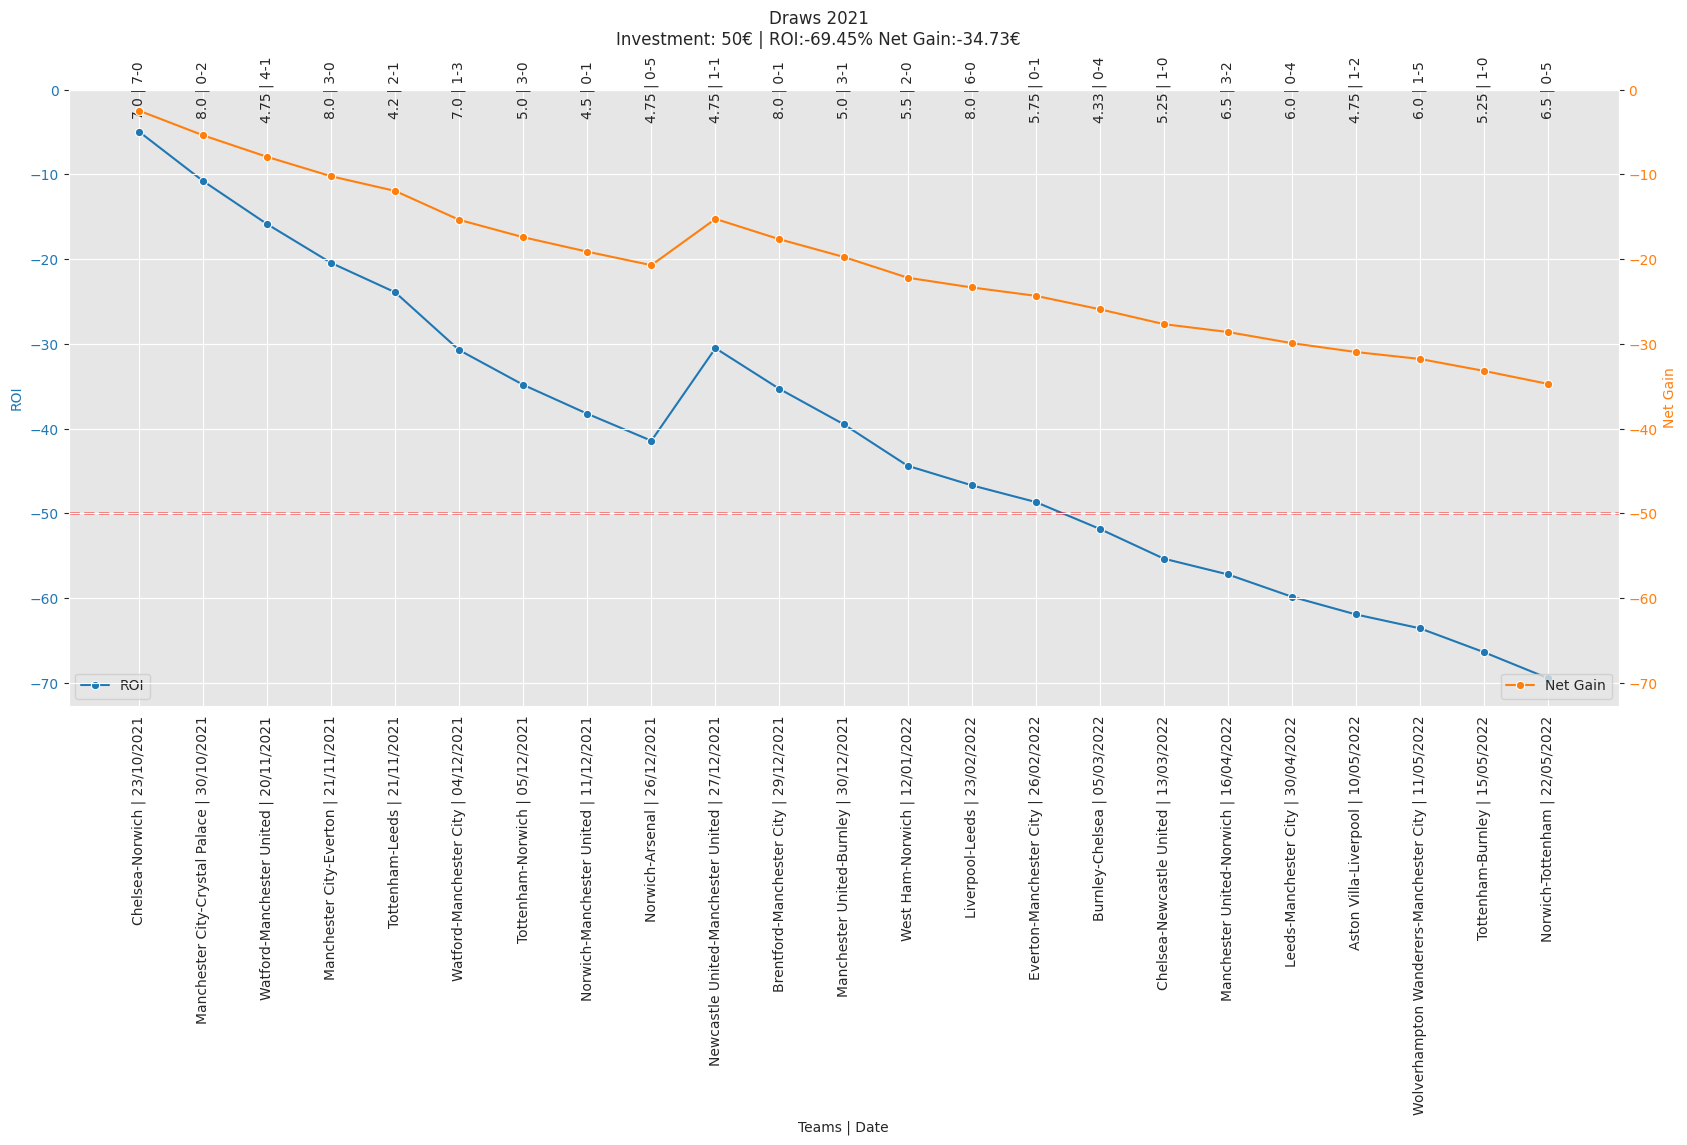

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


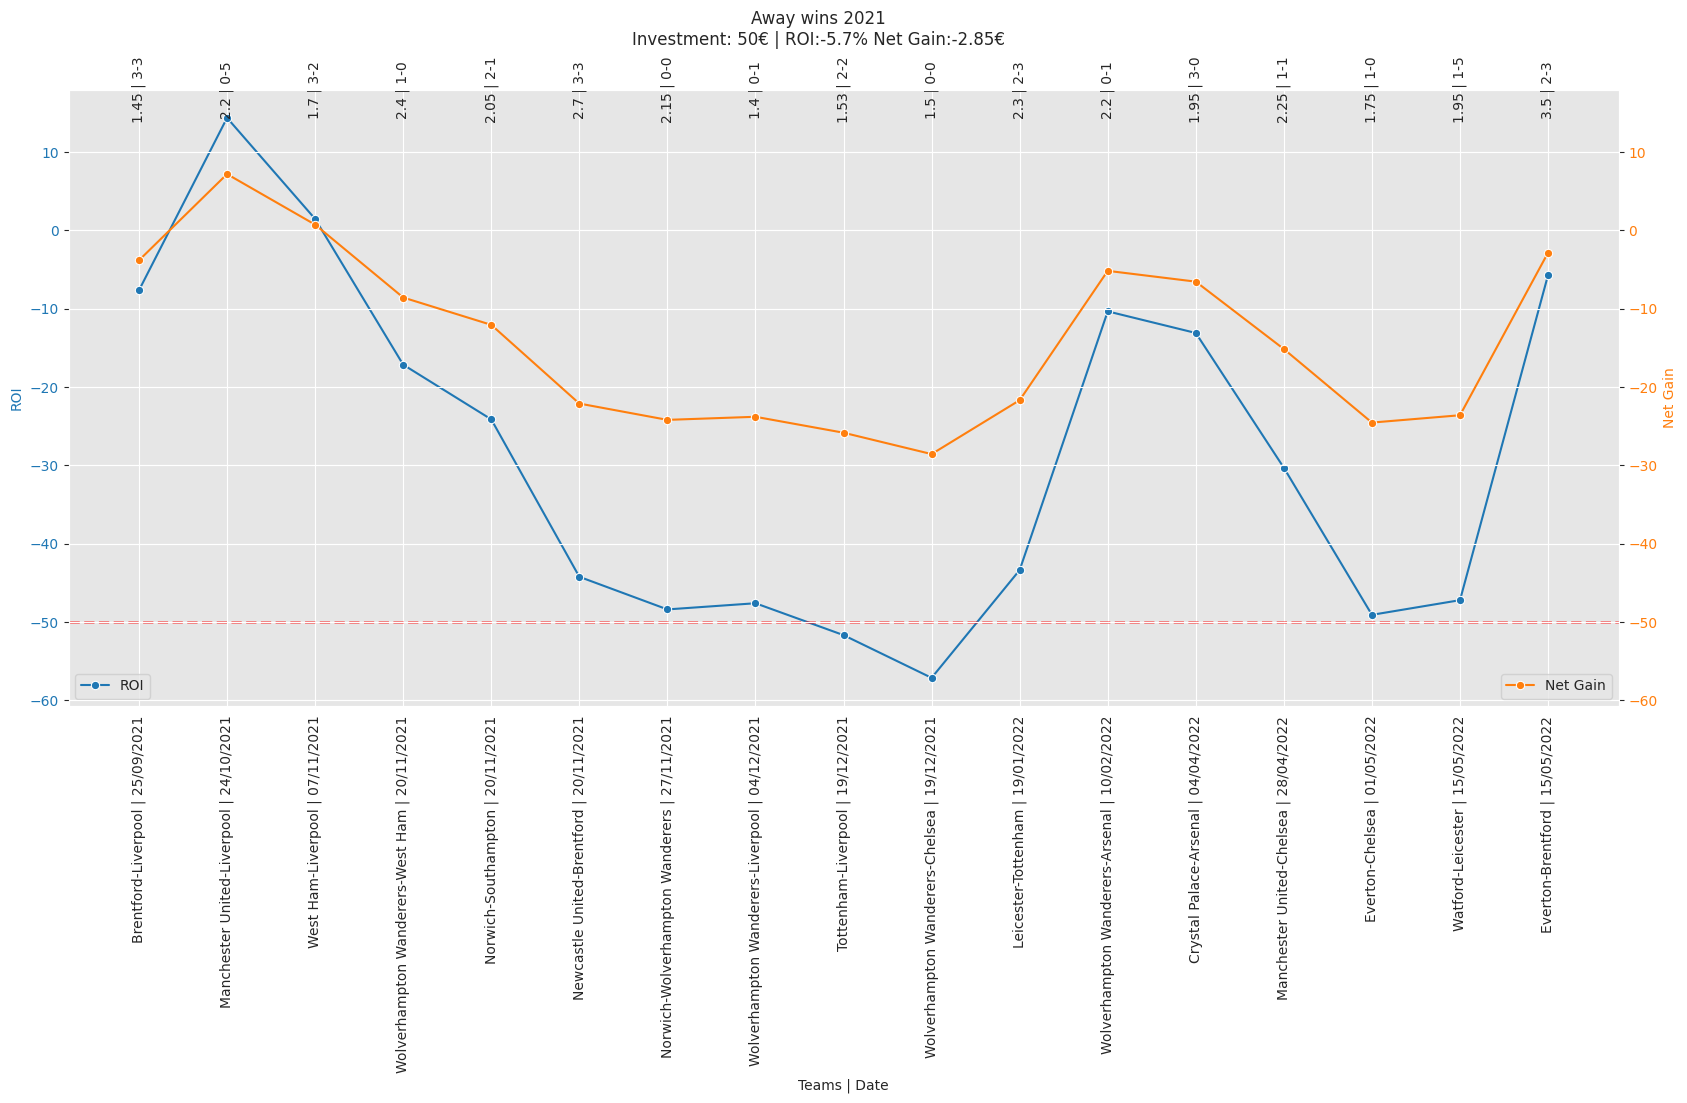

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


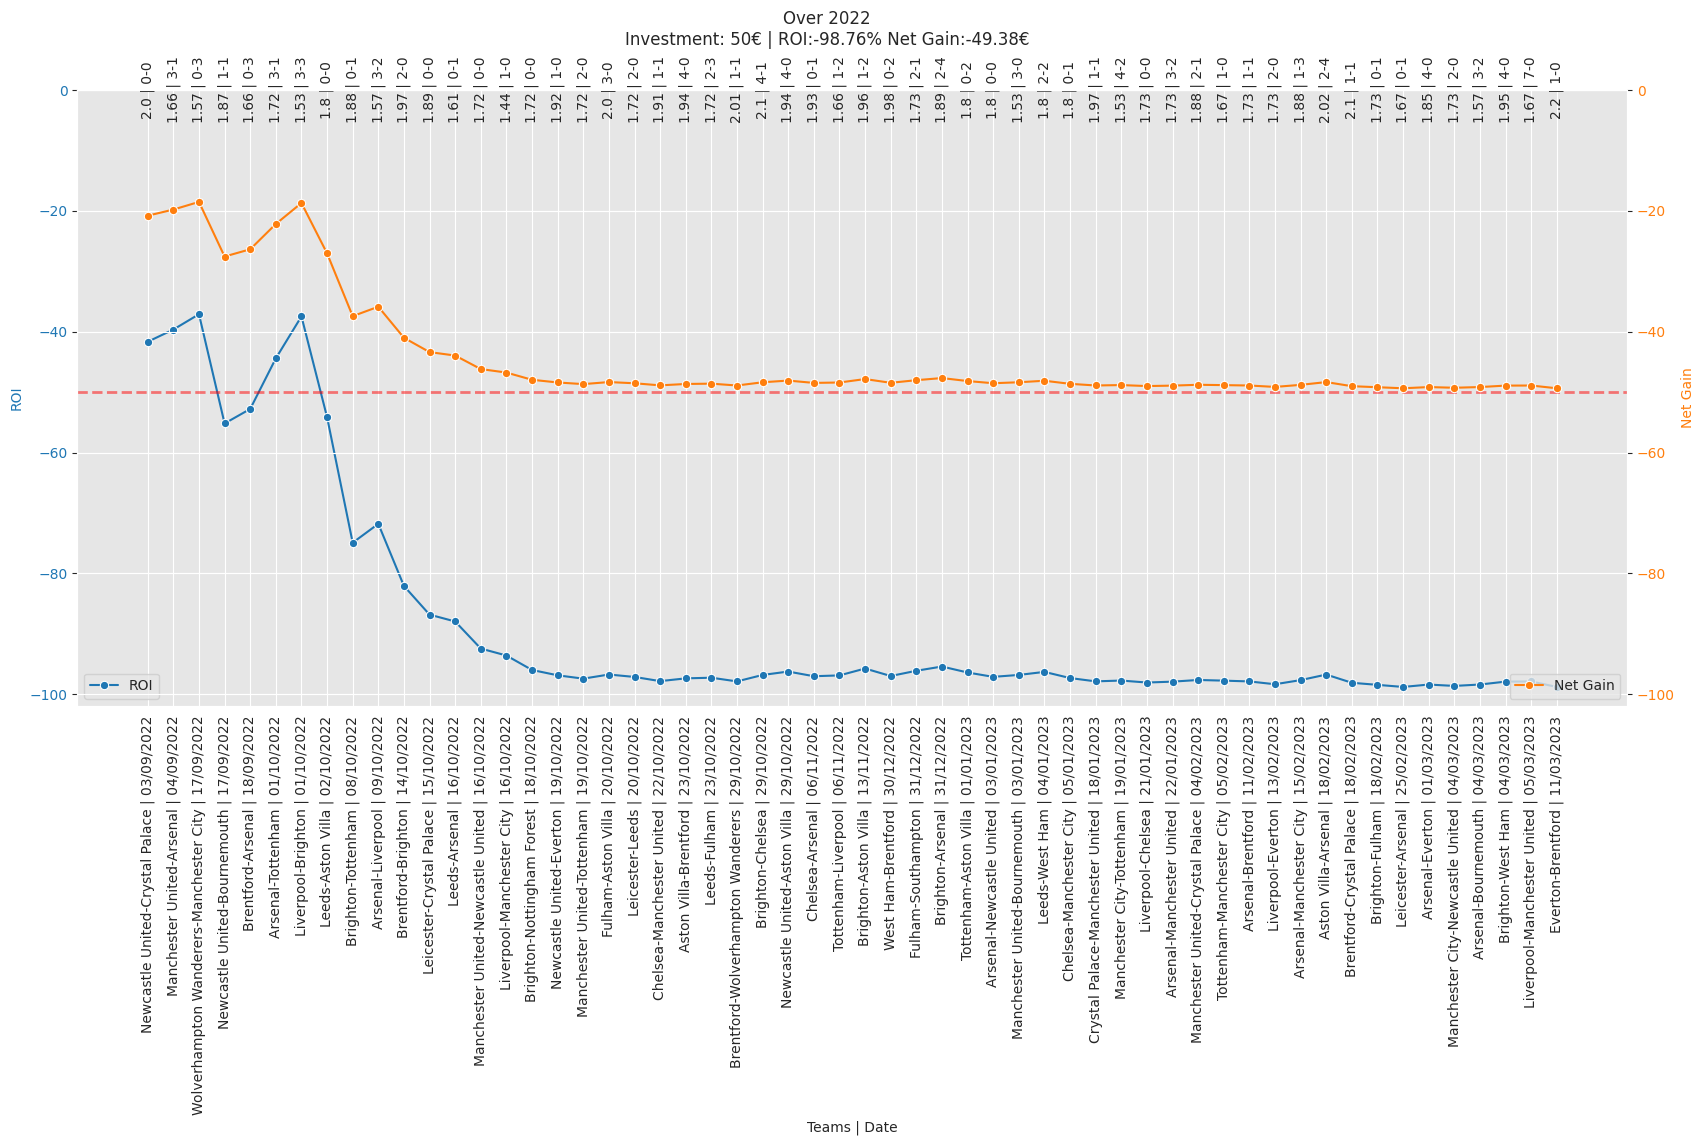

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


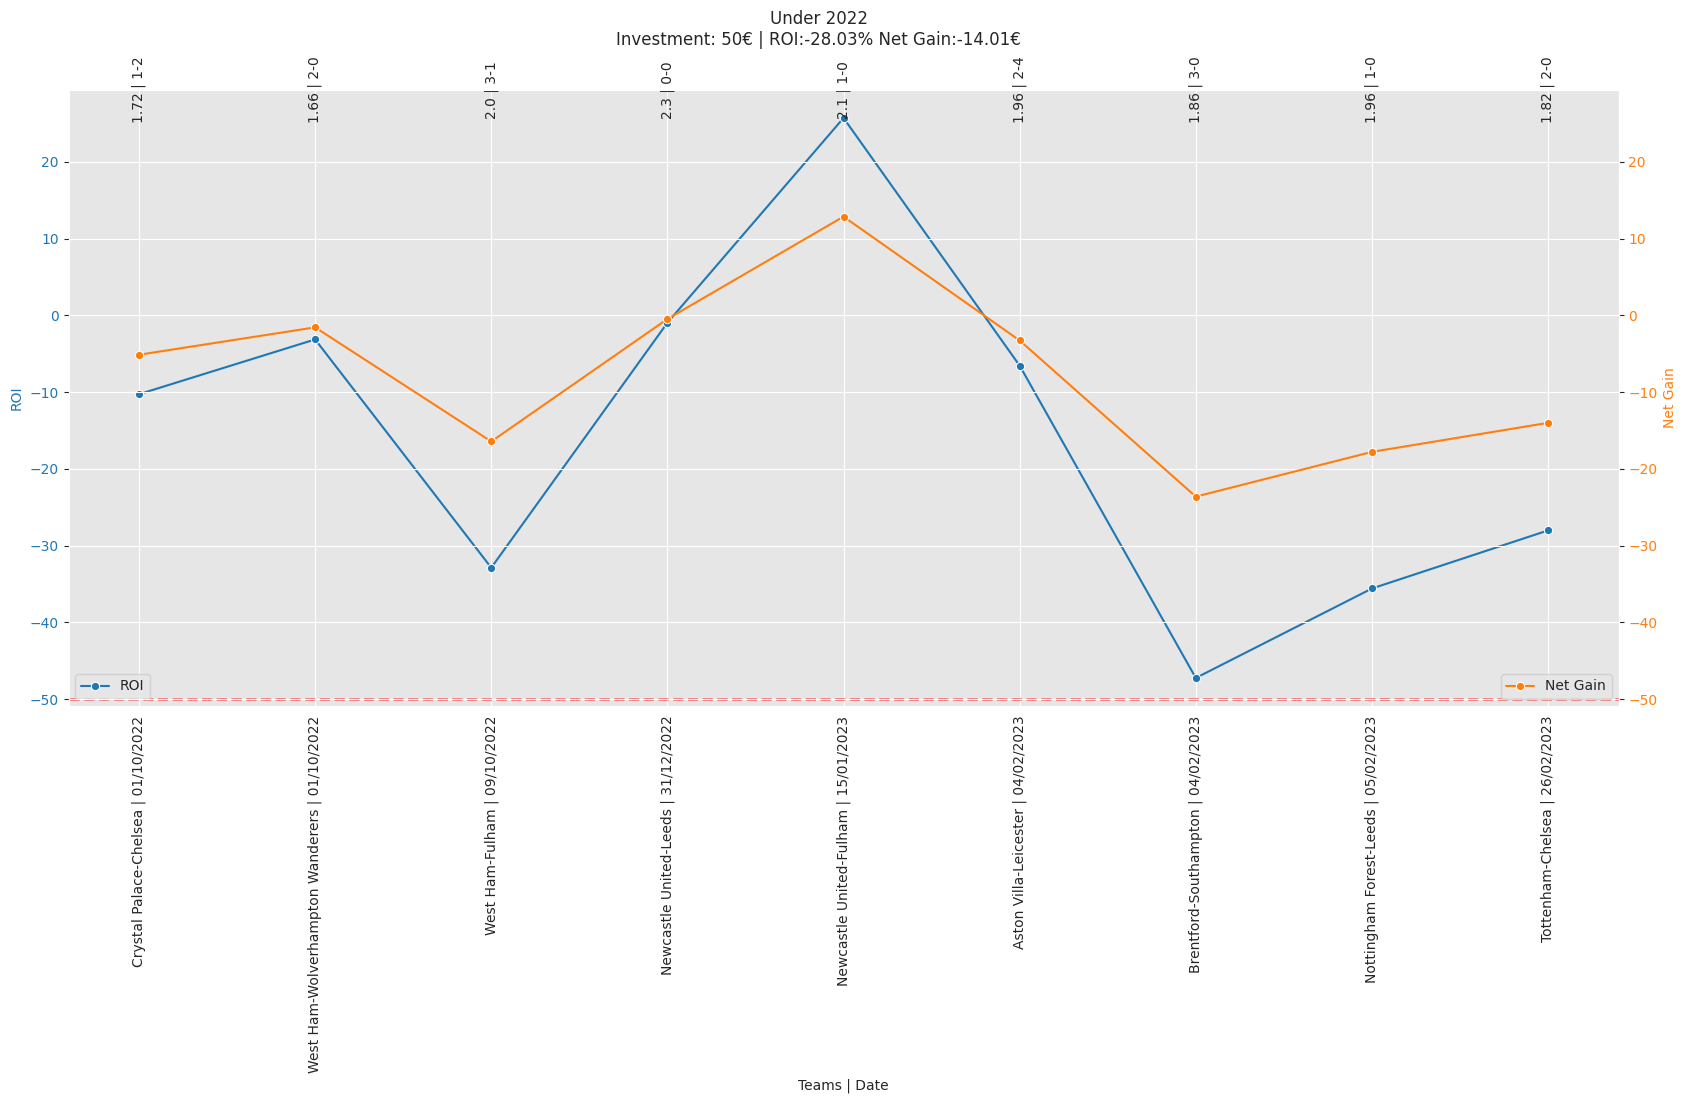

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


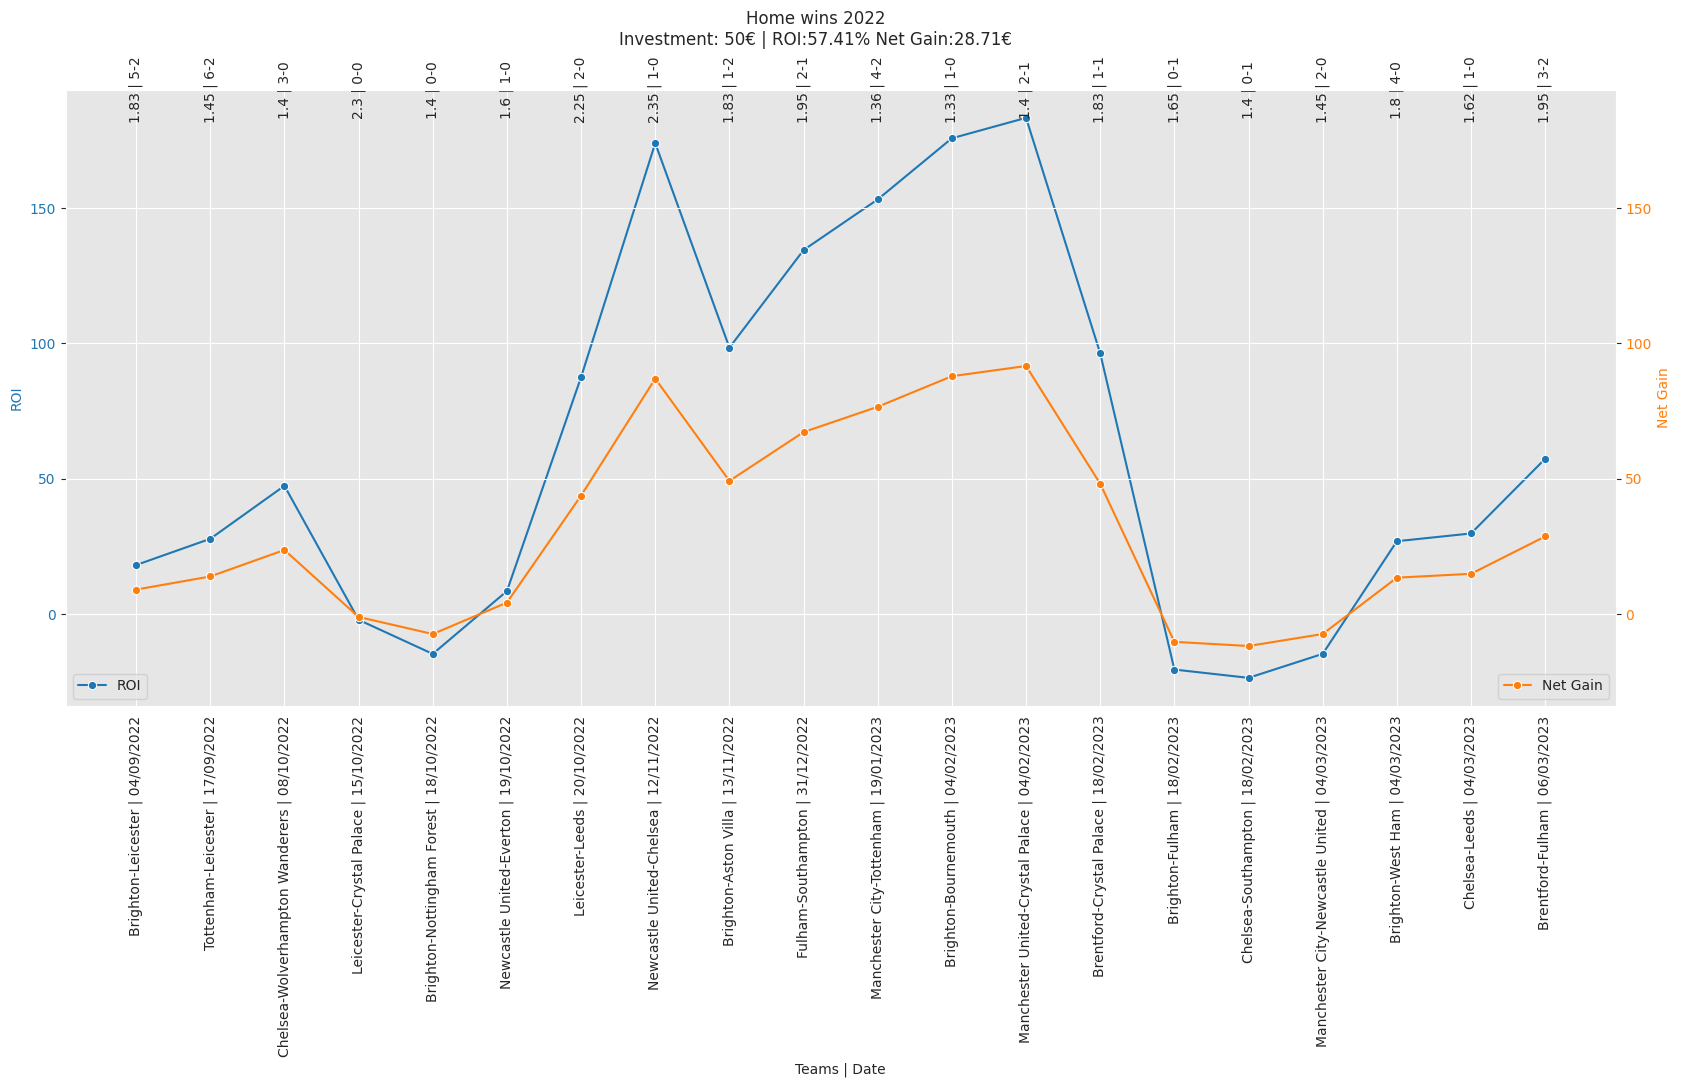

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


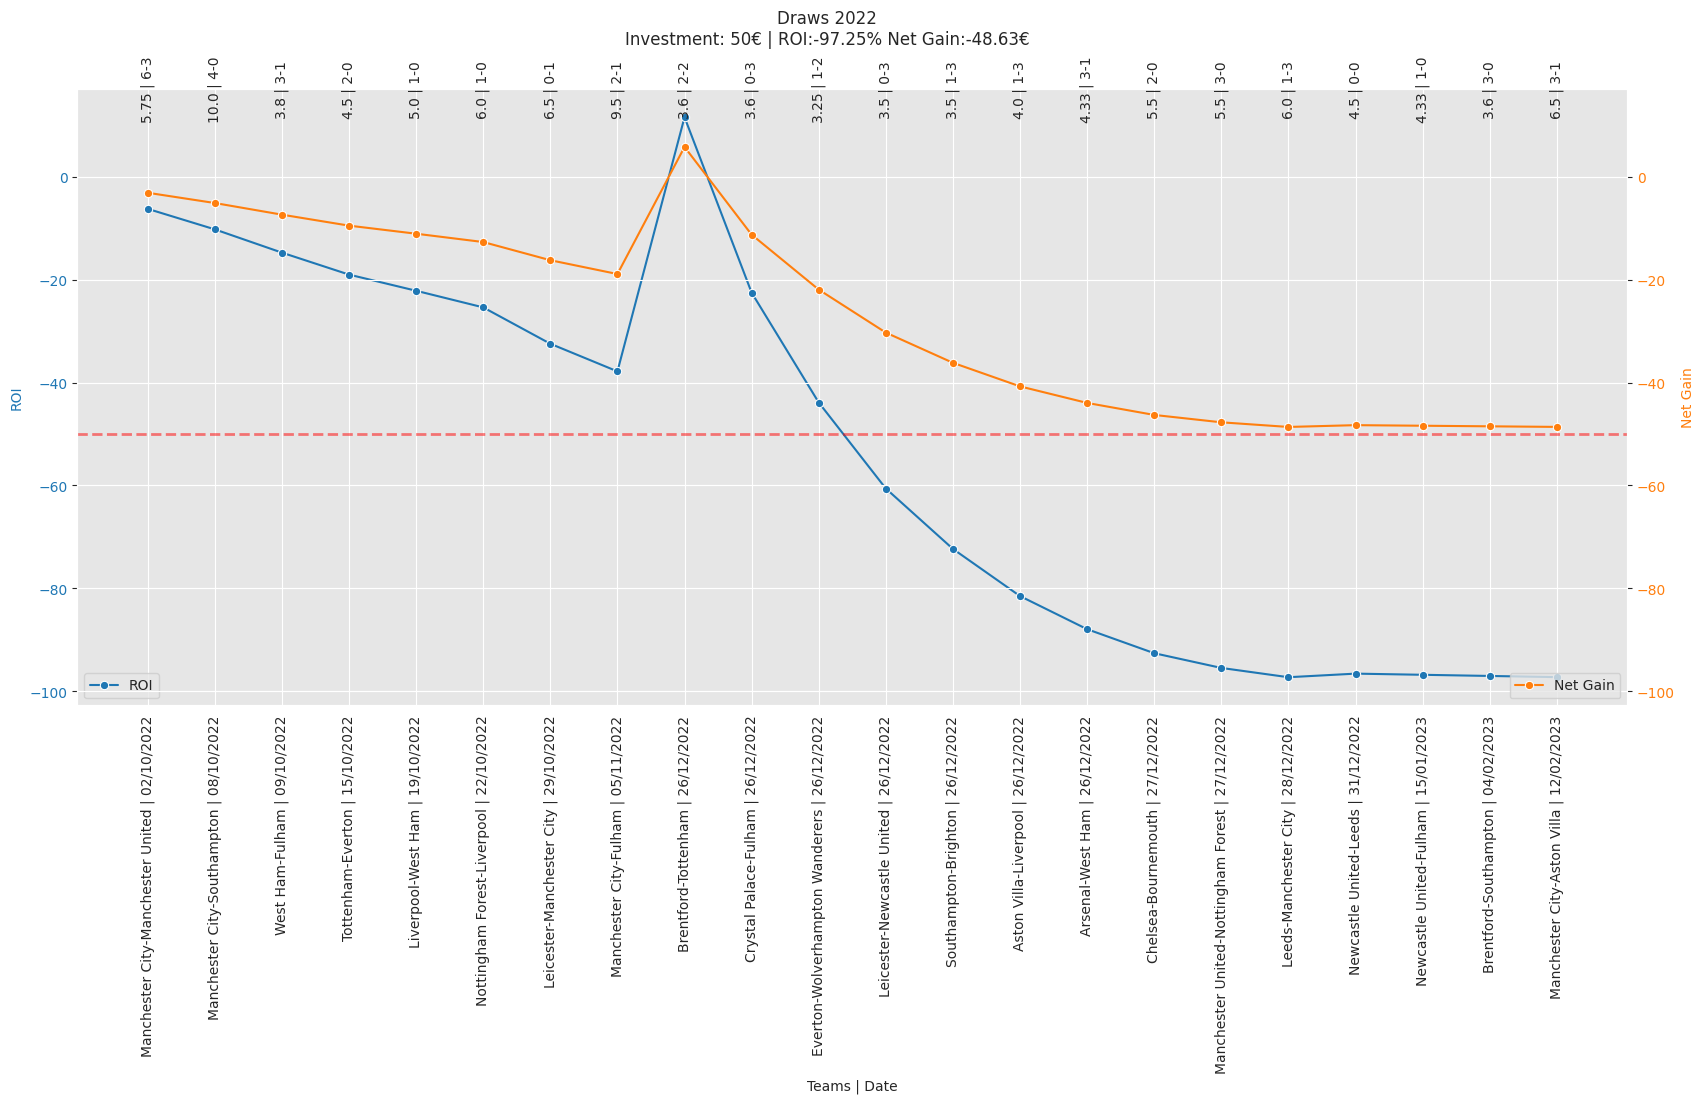

/tmp/ipykernel_72967/4205867432.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
/tmp/ipykernel_72967/4205867432.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)


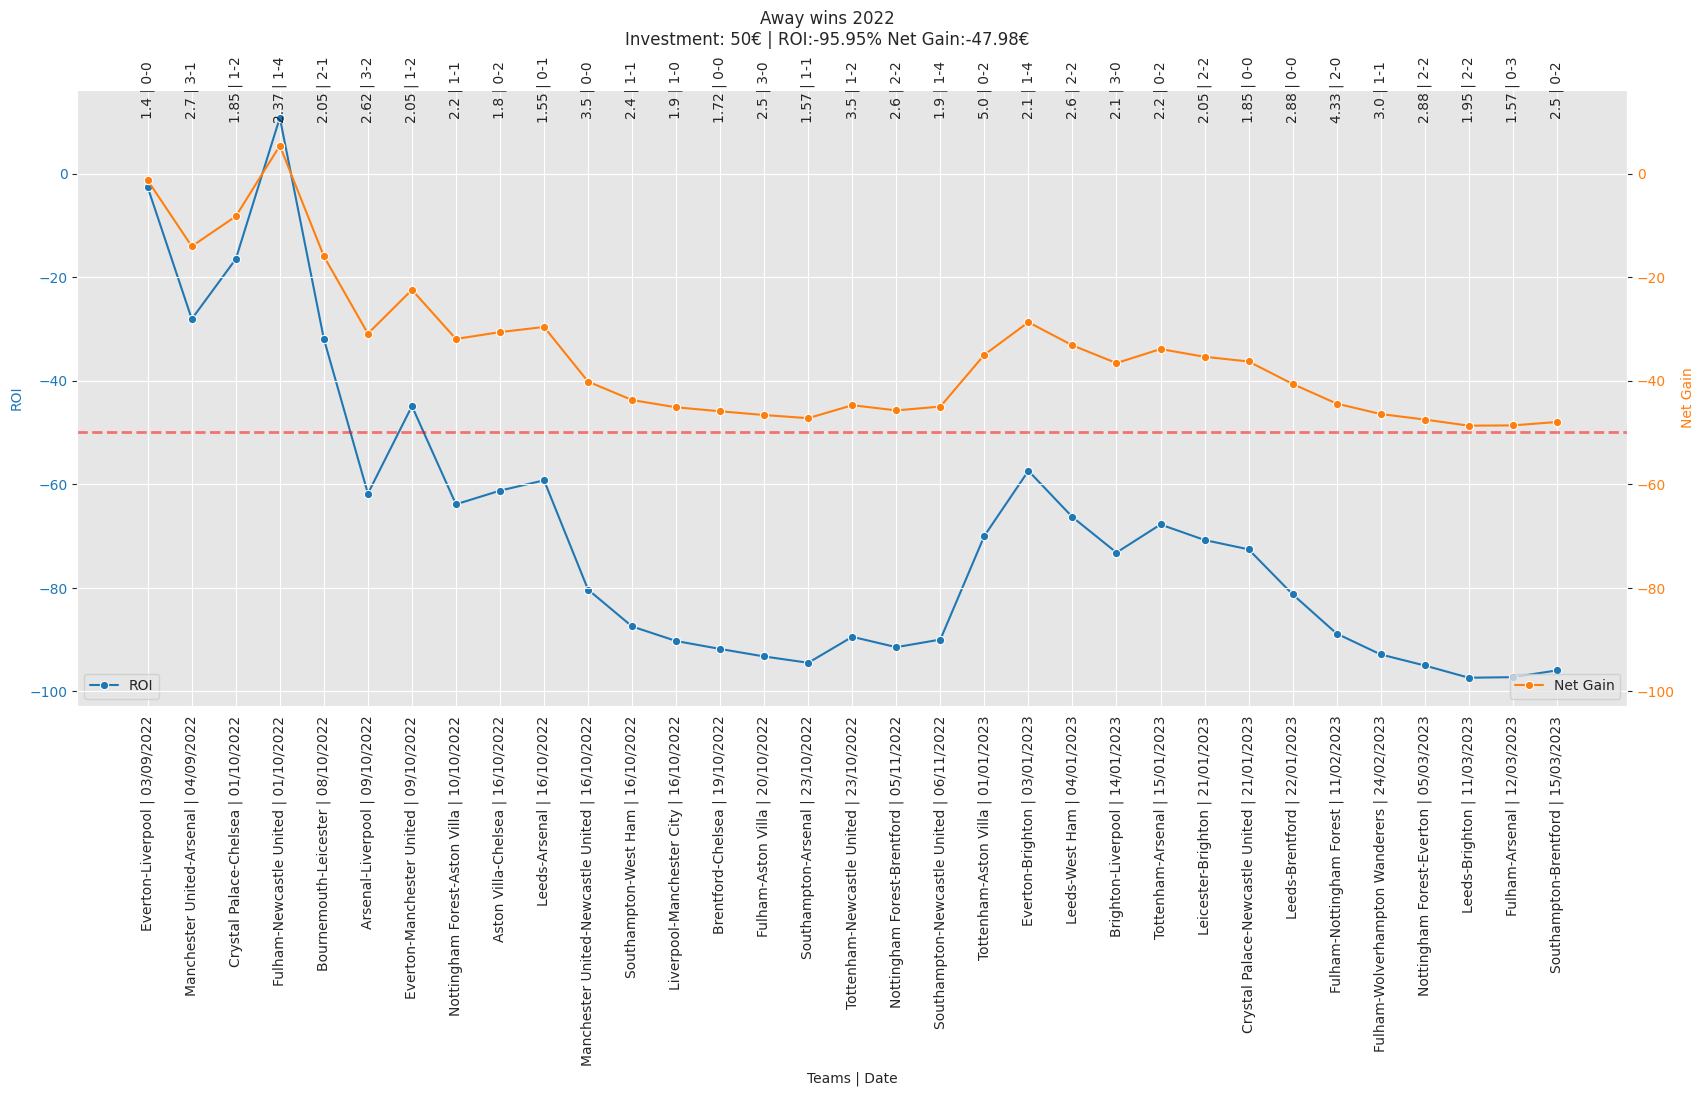

In [46]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
bet_types = ['Over', 'Under', 'Home wins', 'Draws', 'Away wins']
odds = ['BbAv>2.5', 'BbAv<2.5', 'B365H', 'B365D', 'B365A']

for i, year in enumerate(years):
    for j, x in enumerate([Over_bet_list, Under_bet_list, Home_bet_list, Draw_bet_list, Away_bet_list]):
        df = pd.DataFrame(x[i][7])
        df['ROI'] = x[i][5]
        df['Net Gain'] = x[i][6]
        

        # Combine 'HTeam,' 'ATeam,' and 'Date' into a single column for x-axis labels
        df['CombinedLabel'] = df['HTeam'] + '-' + df['ATeam'] + ' | ' + df['Date'].astype(str)
        df.to_csv('Results/' +str(str(bet_types[j]) + ' ' + str(year)+'.csv'), index=False)
    
        # Create a single subplot
        fig, ax1 = plt.subplots(figsize=(20, 8))
        fig.suptitle(str(bet_types[j]) + ' ' + str(year) + '\n' + 'Investment: ' + str(bank) + '€' + ' | ROI:' + str(round(df['ROI'].iloc[-1], 2)) + '%' + ' Net Gain:' + str(round(df['Net Gain'].iloc[-1], 2)) + '€')

        # Plot ROI on the first y-axis (ax1)
        ax1.set_xlabel('Teams | Date')
        ax1.set_ylabel('ROI', color='tab:blue')
        sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Create a second y-axis sharing the same x-axis
        ax2 = ax1.twinx()
        ax2.set_ylabel('Net Gain', color='tab:orange')
        sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)
        ax2.tick_params(axis='y', labelcolor='tab:orange')

        # Find the minimum and maximum values of both y-axes
        y1_min, y1_max = ax1.get_ylim()
        y2_min, y2_max = ax2.get_ylim()

        # Set the y-axis limits for both axes to have the same 0 point
        y_min = min(y1_min, y2_min, 0)
        y_max = max(y1_max, y2_max, 0)

        ax1.set_ylim(y_min, y_max)
        ax2.set_ylim(y_min, y_max)

        # Set the x-axis labels and rotate them
        x_labels = df['CombinedLabel'].tolist()
        x_labels_step = 1  # Adjust the step to control label spacing
        ax1.set_xticks(range(0, len(x_labels), x_labels_step))
        ax1.set_xticklabels(x_labels[::x_labels_step], rotation=90)
        
        # Add text labels at specific x-axis ticks
        x_ticks_to_label = [x_labels[i] for i in range(0, len(x_labels), x_labels_step)]  # Use x-axis labels directly
        for x_tick in x_ticks_to_label:
            k = x_labels.index(x_tick)  # Get the index of the x_tick label in the DataFrame
            odds_value = df[str(odds[j])].iloc[k]
            result_value = df['Result'].iloc[k]

            label = f"{odds_value} | {list(result_value)[2]}-{list(result_value)[9]}"

            # Calculate the y-coordinate for the label
            # You can adjust the value (e.g., +0.02) to control the vertical placement
            y_coord = max(y_min, y_max) + 0.02
            
            # Add the label at the specified x and y coordinates
            ax1.text(x_tick, y_coord, label, rotation=90, ha='center', va='center')

        # Show the legend
        ax1.legend(['ROI'], loc='lower left')
        ax2.legend(['Net Gain'], loc='lower right')

        # Customize the line appearance
        ax1.axhline(y=-50, color='red', linestyle='--', label='Y = -50', linewidth=2, alpha=0.5)

        plt.show()


